In [249]:
import numpy as np 
import pandas as pd
import sklearn 
import seaborn 
import sklearn.model_selection
import pyswarms as ps 

In [250]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/Chhavi Bhadana/Downloads/heart-statlog_csv (1).csv")

In [251]:
df['class'].value_counts()

absent     150
present    120
Name: class, dtype: int64

In [252]:
df['class'] = df['class'].map({'present':1,"absent":0})

In [253]:
for i in df.columns:
    print(df[i].value_counts(),"\n")

54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
64     9
56     9
65     8
67     8
42     8
61     7
63     7
53     7
50     7
48     7
46     7
45     7
43     7
66     6
55     6
49     5
70     4
47     4
69     3
68     3
35     3
40     3
39     3
71     3
37     2
34     2
76     1
74     1
29     1
38     1
77     1
Name: age, dtype: int64 

1    183
0     87
Name: sex, dtype: int64 

4    129
3     79
2     42
1     20
Name: chest, dtype: int64 

120    34
130    31
140    30
150    17
110    17
160    11
125    10
112     9
128     9
138     9
118     7
132     6
108     6
135     6
145     5
124     5
100     4
134     4
152     4
126     3
142     3
115     3
105     3
136     3
180     3
122     3
170     2
178     2
94      2
102     2
144     1
129     1
192     1
101     1
174     1
172     1
104     1
165     1
106     1
158     1
156     1
155     1
117     1
123     1
148     1
146     1
200     1
Name: resting_blood_pressur

In [254]:
df.head()

age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0   70    1      4                     130                322   
1   67    0      3                     115                564   
2   57    1      2                     124                261   
3   64    1      4                     128                263   
4   74    0      2                     120                269   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     2   
1                    0                                     2   
2                    0                                     0   
3                    0                                     0   
4                    0                                     2   

   maximum_heart_rate_achieved  exercise_induced_angina  oldpeak  slope  \
0                          109                        0      2.4      2   
1                          160                        0      1.6      2   
2                          141                        0      0.3      1   
3                          105                        1      0.2      2   
4                          121                        1      0.2      1   

   number_of_major_vessels  thal  class  
0                        3     3      1  
1                        0     7      0  
2                        0     7      1  
3                        1     7      0  
4                        1     3      0

In [255]:
cat = df.iloc[:,[2,10,12]]
num = df.loc[:,~df.columns.isin(cat.columns)]

In [256]:
a = pd.get_dummies(df['chest'], prefix = "chest")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [257]:
frames = [a, b, c,num]
df = pd.concat(frames, axis = 1)
df.head()

chest_1  chest_2  chest_3  chest_4  thal_3  thal_6  thal_7  slope_1  \
0        0        0        0        1       1       0       0        0   
1        0        0        1        0       0       0       1        0   
2        0        1        0        0       0       0       1        1   
3        0        0        0        1       0       0       1        0   
4        0        1        0        0       1       0       0        1   

   slope_2  slope_3  ...  sex  resting_blood_pressure  serum_cholestoral  \
0        1        0  ...    1                     130                322   
1        1        0  ...    0                     115                564   
2        0        0  ...    1                     124                261   
3        1        0  ...    1                     128                263   
4        0        0  ...    0                     120                269   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     2   
1                    0                                     2   
2                    0                                     0   
3                    0                                     0   
4                    0                                     2   

   maximum_heart_rate_achieved  exercise_induced_angina  oldpeak  \
0                          109                        0      2.4   
1                          160                        0      1.6   
2                          141                        0      0.3   
3                          105                        1      0.2   
4                          121                        1      0.2   

   number_of_major_vessels  class  
0                        3      1  
1                        0      0  
2                        0      1  
3                        1      0  
4                        1      0  

[5 rows x 21 columns]

In [258]:
frames = [a, b, c,num]
df = pd.concat(frames, axis = 1)
df.head()

chest_1  chest_2  chest_3  chest_4  thal_3  thal_6  thal_7  slope_1  \
0        0        0        0        1       1       0       0        0   
1        0        0        1        0       0       0       1        0   
2        0        1        0        0       0       0       1        1   
3        0        0        0        1       0       0       1        0   
4        0        1        0        0       1       0       0        1   

   slope_2  slope_3  ...  sex  resting_blood_pressure  serum_cholestoral  \
0        1        0  ...    1                     130                322   
1        1        0  ...    0                     115                564   
2        0        0  ...    1                     124                261   
3        1        0  ...    1                     128                263   
4        0        0  ...    0                     120                269   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     2   
1                    0                                     2   
2                    0                                     0   
3                    0                                     0   
4                    0                                     2   

   maximum_heart_rate_achieved  exercise_induced_angina  oldpeak  \
0                          109                        0      2.4   
1                          160                        0      1.6   
2                          141                        0      0.3   
3                          105                        1      0.2   
4                          121                        1      0.2   

   number_of_major_vessels  class  
0                        3      1  
1                        0      0  
2                        0      1  
3                        1      0  
4                        1      0  

[5 rows x 21 columns]

In [259]:
x = df.drop(['class'],axis=1)
y = df['class']

In [260]:
y.shape

(270,)

In [261]:
#Normalize the dataset
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
scaled = pd.DataFrame(mx.fit_transform(x),columns = x.columns)

Splitting the data using train_test_split

In [262]:

xtrain, xtest, ytrain, ytest = train_test_split(scaled, y, test_size= 0.3, random_state=0)

In [263]:
ytrain.shape

(189,)

In [264]:
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve 
from sklearn.model_selection import cross_val_score , GridSearchCV , KFold
from sklearn.linear_model import LogisticRegression

In [265]:
LR = LogisticRegression()
LR.fit(xtrain , ytrain)
ytest_pred = LR.predict(xtest)
ytrain_pred = LR.predict(xtrain)

In [266]:
from sklearn.metrics import classification_report
CR = classification_report(ytest, ytest_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.74      0.79      0.76        33

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81



In [267]:
X = scaled.values
y = y.values

In [303]:
def f_per_particle(m, alpha):
    total_features = x.shape[1]

    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:, m ==1]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.20, random_state=None)
    # Perform classification and store performance in P
    LR.fit(X_train, y_train)
    P = (LR.predict(X_test) == y_test).mean()
    
    scores = cross_val_score(LR, X_subset, y, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    P = scores.mean()
    
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    

    print("Particle j: ", j)
    return j

In [304]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.38709677,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.25806452,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.0483871 ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.20967742,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06451613,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.24193548,
        1.        ]])

In [305]:
def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [271]:
scaled.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['chest_1', 'chest_2', 'chest_3', 'chest_4', 'thal_3', 'thal_6',
       'thal_7', 'slope_1', 'slope_2', 'slope_3', 'age', 'sex',
       'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'number_of_major_vessels'],
      dtype='object')>

In [306]:
options = {'c1': 2.05, 'c2': 2.05, 'w':0.73, 'k': 30, 'p':2}
# Call instance of PSO
dimensions =  X.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=270, dimensions=dimensions,options=options)
# Perform optimization
cost, pos = optimizer.optimize(f, iters=100, verbose=2)


2021-09-21 14:54:19,354 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2.05, 'c2': 2.05, 'w': 0.73, 'k': 30, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/100

Accuracy: 0.78 (+/- 0.00)
Particle j:  0.26155555555555554
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.18985185185185194
Accuracy: 0.77 (+/- 0.06)
Particle j:  0.27081481481481484
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.22192592592592592
Accuracy: 0.79 (+/- 0.03)
Particle j:  0.2697777777777778
Accuracy: 0.79 (+/- 0.06)
Particle j:  0.26703703703703713
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.23325925925925928
Accuracy: 0.77 (+/- 0.05)
Particle j:  0.2620740740740742
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.23925925925925928
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.19844444444444437
Accuracy: 0.79 (+/- 0.10)
Particle j:  0.2425185185185185
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2632592592592593
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.21266666666666664
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.24096296296296288
Accuracy: 0.78 (+/- 0.05)
Particle j:  0.25555555555555554
Accuracy: 0.78 (+/- 0.07)
Particle j:  0.26755555555555566
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.20940740740740743
A

pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.154

Accuracy: 0.81 (+/- 0.05)
Particle j:  0.22022222222222212
Accuracy: 0.77 (+/- 0.02)
Particle j:  0.2648148148148147
Accuracy: 0.80 (+/- 0.12)
Particle j:  0.22674074074074063
Accuracy: 0.76 (+/- 0.13)
Particle j:  0.2625925925925926
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.23548148148148143
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.21592592592592594
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17888888888888888
Accuracy: 0.78 (+/- 0.00)
Particle j:  0.24355555555555553
Accuracy: 0.78 (+/- 0.01)
Particle j:  0.23429629629629622
Accuracy: 0.80 (+/- 0.01)
Particle j:  0.22074074074074063
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.19518518518518518
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.20170370370370366
Accuracy: 0.78 (+/- 0.01)
Particle j:  0.24629629629629624
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.19844444444444437
Accuracy: 0.77 (+/- 0.04)
Particle j:  0.2588148148148147
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17888888888888888
Accuracy: 0.80 (+/- 0.01)
Particle j:  0.21474074074074062


pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.164

Accuracy: 0.83 (+/- 0.02)
Particle j:  0.20718518518518517
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20444444444444437
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.18762962962962967
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2240000000000001
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.20718518518518517
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.18385185185185182
Accuracy: 0.79 (+/- 0.10)
Particle j:  0.2485185185185185
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.18762962962962967
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.20066666666666663
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.20718518518518517
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.20170370370370366
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1968888888888889
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.21918518518518518
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1816296296296297
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.19792592592592595
Accuracy: 0.83 (+/- 0.15)
Particle j:  0.21866666666666662
A

pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.154


Particle j:  0.21266666666666664
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.17185185185185184
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.23548148148148154
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19140740740740741
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.21044444444444438
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17888888888888888
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17340740740740743
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17888888888888888
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.19466666666666665
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.18488888888888888
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.2011851851851852
Accuracy: 0.83 (+/- 0.1

pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.154


Particle j:  0.2109629629629629
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.19844444444444437
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.18488888888888888
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.19518518518518518
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.19518518518518518
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1854074074074074
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19792592592592595
Accuracy: 0.78 (+/- 0.05)
Particle j:  0.25555555555555554
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.2485185185185185
Accuracy: 0.77 (+/- 0.05)
Particle j:  0.27081481481481484
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.23599999999999985
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.2425185185185185
Accuracy: 0.78 (+/- 0.06)
Particle j:  0.25829629629629647
Accuracy: 0.79 (+/- 0.15)
Particle j:  0.2545185185185185
Accuracy: 0.78 (+/- 0.08)
Particle j:  0.25229629629629646
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.22674074074074063
Accuracy: 0.76 (+/- 0.04)
Particle j:  0.2805925925925926
Accuracy: 0.76 (+/- 0.06)
Pa

pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.154


Particle j:  0.2745925925925926
Accuracy: 0.79 (+/- 0.11)
Particle j:  0.261037037037037
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1668888888888889
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.19192592592592594
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.19140740740740741
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037027
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.18318518518518517
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1641481481481482
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.18044444444444438
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1641481481481482
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.1924444444444444
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17340740740740743
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1581481481481482
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.16140740740740744
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.2109629629629629
Accuracy: 0.85 (+/- 0.08)
Parti

pyswarms.discrete.binary:   6%|▌         |6/100, best_cost=0.146

Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1581481481481482
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15437037037037046
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.1989629629629629
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19192592592592594
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18814814814814823
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.2011851851851852
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.19088888888888889
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.18592592592592594
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.2011851851851852
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19466666666666665
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.20770370370370367
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18214814814814823
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.21044444444444438
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.2001481481481482
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19466666666666665
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18214814814814823
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19192592592592594
Ac

pyswarms.discrete.binary:   7%|▋         |7/100, best_cost=0.146


Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18214814814814823
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.19466666666666665
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.2011851851851852
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.19844444444444437
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.2011851851851852
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.20666666666666664
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.19518518518518518
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.1924444444444444
Accuracy: 0.82 (+/- 0.03)
Particle j:  0.19844444444444437
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.19792592592592595
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.19570370370370369
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17614814814814822
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.19570370370370369
Accuracy: 0.82 (+/- 0.03)
Particle j:  0.19844444444444437
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.21370370370370367
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.20444444444444437
Accuracy: 0.82 (+/- 0.03)

pyswarms.discrete.binary:   8%|▊         |8/100, best_cost=0.146

Accuracy: 0.81 (+/- 0.02)
Particle j:  0.23222222222222214
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.21044444444444438
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.2512592592592593
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.2414814814814814
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.21044444444444438
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.23600000000000007
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.20444444444444437
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.18437037037037046
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.19570370370370369
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.21044444444444438
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.21318518518518517
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.22074074074074063
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.21592592592592594
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17837037037037046
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.21970370370370368
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.21044444444444438

pyswarms.discrete.binary:   9%|▉         |9/100, best_cost=0.146

Accuracy: 0.84 (+/- 0.05)
Particle j:  0.19088888888888889
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.2001481481481482
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18814814814814823
Accuracy: 0.80 (+/- 0.09)
Particle j:  0.23874074074074064
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.21318518518518517
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1668888888888889
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.16311111111111107
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20222222222222214
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1581481481481482
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.23325925925925928
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.18044444444444438
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.16740740740740742
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1608888888888889
Acc

pyswarms.discrete.binary:  10%|█         |10/100, best_cost=0.146

Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17340740740740743
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.23925925925925917
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.22074074074074074
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20822222222222214
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.22999999999999984
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.18866666666666665
Accuracy: 0.79 (+/- 0.06)
Particle j:  0.2365185185185185
Accuracy: 0.82 (+/- 0.11)
Particle j:  0.1924444444444444
Accuracy: 0.79 (+/- 0.05)
Particle j:  0.25177777777777777
Accuracy: 0.79 (+/- 0.06)
Particle j:  0.2337777777777778
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.22725925925925927
Accuracy: 0.82 (+/- 0.12)
Particle j:  0.21370370370370367
Accuracy: 0.79 (+/- 0.05)
Particle j:  0.2425185185185185
Accuracy: 0.80 (+/- 0.12)
Particle j:  0.22674074074074063
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.21474074074074062
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22348148148148142
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.22074074074074063
A

pyswarms.discrete.binary:  11%|█         |11/100, best_cost=0.146


Particle j:  0.2245185185185184
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1488888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15437037037037046
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17014814814814821
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111115
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.15762962962962968
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1548888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.06)
Particl

pyswarms.discrete.binary:  12%|█▏        |12/100, best_cost=0.142


Particle j:  0.1728888888888889
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.21592592592592594
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.2577777777777778
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.25177777777777777
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.23925925925925928
Accuracy: 0.78 (+/- 0.04)
Particle j:  0.26755555555555555
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.25177777777777777
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.25177777777777777
Accuracy: 0.79 (+/- 0.05)
Particle j:  0.2577777777777778
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.23822222222222234
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.2229629629629629
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.24800000000000005
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.2229629629629629
Accuracy: 0.78 (+/- 0.04)
Particle j:  0.26755555555555555
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.25177777777777777
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.25177777777777777
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.22022222222222212
Accuracy: 0.81 (+/- 0.06)
P

pyswarms.discrete.binary:  13%|█▎        |13/100, best_cost=0.142

Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1941481481481482
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.21970370370370368
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.2229629629629629
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.2577777777777778
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14562962962962966
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17718518518518517
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.1756296296296297
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15762962962962968
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17992592592592593
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20222222222222214
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15762962962962968
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16037037037037047
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.19948148148148143
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15437037037037046
Ac

pyswarms.discrete.binary:  14%|█▍        |14/100, best_cost=0.14

Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15437037037037046
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15385185185185193
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1488888888888889
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1641481481481482
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14562962962962966
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1428888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15162962962962967
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.17066666666666663
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.16740740740740742
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.14562962962962966
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.16740740740740742
Accur

pyswarms.discrete.binary:  15%|█▌        |15/100, best_cost=0.136


Particle j:  0.14562962962962966
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1854074074074074
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.21696296296296289
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.21696296296296289
Accuracy: 0.78 (+/- 0.06)
Particle j:  0.24629629629629624
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20170370370370366
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.20066666666666663
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1668888888888889
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20170370370370366
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19466666666666665
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.19192592592592594
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.19192592592592594
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.19844444444444437
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20170370370370366
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19792592592592595
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20770370370370367
Accuracy: 0.79 (+/- 0.05

pyswarms.discrete.binary:  16%|█▌        |16/100, best_cost=0.136

Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.03)
Particle j:  0.17940740740740743
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.17940740740740743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15162962962962967
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.17666666666666664
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.18918518518518518
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.17392592592592593
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17014814814814821
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19792592592592595
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19792592592592595
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.2011851851851852
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.18918518518518518
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.18266666666666664

pyswarms.discrete.binary:  17%|█▋        |17/100, best_cost=0.136


Particle j:  0.1924444444444444
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.18592592592592594
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18592592592592594
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.17666666666666664
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.2011851851851852
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16962962962962969
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.18644444444444438
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037027
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.19622222222222213
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17992592592592593
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17992592592592593
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1548888888888889
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16362962962962957
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037027
Accuracy: 0.84 (+/- 0.09)
P

pyswarms.discrete.binary:  18%|█▊        |18/100, best_cost=0.136


Particle j:  0.17992592592592593
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1777037037037037
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.1869629629629629
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962968
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17118518518518516
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15162962962962967
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.1989629629629629
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1668888888888889
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.18044444444444438
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.18644444444444438
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.19622222222222213
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17718518518518517
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.1989629629629629
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17718518518518517
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17118518518518516
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18044444444444438
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1641481481481482
Accuracy: 0.83 (+/- 0.06)
Pa

pyswarms.discrete.binary:  19%|█▉        |19/100, best_cost=0.136

Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17118518518518516
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1396296296296297
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1581481481481482
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15385185185185185
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15111111111111106
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.14511111111111108
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14511111111111108
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037027
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15111111111111106
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.14837037037037026
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.14511111111111108
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15111111111111106
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.14511111111111108
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1641481481481482


pyswarms.discrete.binary:  20%|██        |20/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14562962962962955
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1641481481481482
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.1756296296296297
Accuracy: 0.79 (+/- 0.11)
Particle j:  0.23977777777777778
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1816296296296297
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.21318518518518517
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1816296296296297
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1816296296296297
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17837037037037046
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17237037037037045
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.19362962962962968
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.20666666666666664
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1854074074074074
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1816296296296297
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17837037037037046
Accu

pyswarms.discrete.binary:  21%|██        |21/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16362962962962968
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15059259259259253
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.20222222222222214
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15711111111111106
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16911111111111105
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15711111111111106
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15762962962962968
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1728888888888889
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15059259259259253
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1854074074074074
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1728888888888889
Ac

pyswarms.discrete.binary:  22%|██▏       |22/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15162962962962967
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16962962962962969
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16911111111111116
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15762962962962956
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16311111111111115
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15711111111111106
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15659259259259253
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15162962962962967
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16311111111111115
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19518518518518518
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.160370370370370

pyswarms.discrete.binary:  23%|██▎       |23/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1854074074074074
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.19740740740740742
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.18866666666666665
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1854074074074074
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.19740740740740742
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.19740740740740742

pyswarms.discrete.binary:  24%|██▍       |24/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.04)
Particle j:  0.19740740740740742
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.15540740740740744
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.15540740740740744
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.16466666666666663
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1581481481481482
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.15540740740740744
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Acc

pyswarms.discrete.binary:  24%|██▍       |24/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.09)
Particle j:  0.14185185185185184
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.17066666666666663
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1641481481481482


pyswarms.discrete.binary:  25%|██▌       |25/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.09)
Particle j:  0.21422222222222215
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.21422222222222215
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.21370370370370367
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20822222222222214
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20822222222222214
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.21370370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.22348148148148142
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.22074074074074063
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.207703703703703

pyswarms.discrete.binary:  26%|██▌       |26/100, best_cost=0.13


Particle j:  0.22348148148148142
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17614814814814822
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1756296296296297
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1816296296296297
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.16585185185185183
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.16585185185185183
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.17185185185185192
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18814814814814823
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.18437037037037027
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1816296296296297
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18814814814814823
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.16585185185185183
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.16585185185185183
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.18437037037037027
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17888888888888888
Accuracy: 0.86 (+/- 0.11)

pyswarms.discrete.binary:  27%|██▋       |27/100, best_cost=0.13


Particle j:  0.16311111111111107
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1396296296296297
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1521481481481482
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15162962962962967
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17718518518518517
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1548888888888889
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.13637037037037048
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15111111111111114
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1521481481481482
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1581481481481482
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111114
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1396296296296297
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17718518518518517
Accuracy: 0.85 (+/- 0.07)
Pa

pyswarms.discrete.binary:  28%|██▊       |28/100, best_cost=0.13


Particle j:  0.15762962962962968
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18266666666666664
Accuracy: 0.75 (+/- 0.04)
Particle j:  0.26962962962962966
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.18044444444444438
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18266666666666664
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.18370370370370367
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.18644444444444438
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.1777037037037037
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.17718518518518517
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.18044444444444438
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.1777037037037037
Accuracy: 0.83 (+/- 0.07

pyswarms.discrete.binary:  29%|██▉       |29/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19518518518518518
Accuracy: 0.81 (+/- 0.03)
Particle j:  0.19622222222222213
Accuracy: 0.77 (+/- 0.04)
Particle j:  0.24681481481481488
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.1924444444444444
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17888888888888888
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15762962962962968
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.2109629629629629
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1728888888888889
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1854074074074074
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1728888888888889
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Ac

pyswarms.discrete.binary:  30%|███       |30/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.04)
Particle j:  0.16792592592592592
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17340740740740743
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17066666666666663
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.16792592592592592
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.16792592592592592
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1581481481481482
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.17718518518518517
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.16792592592592592
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1396296296296297
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15437037037037027
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.18370370370370367
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17066666666666663
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.16518518518518516
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.17718518518518517
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.16792592592592592
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.14237037037037048


pyswarms.discrete.binary:  31%|███       |31/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.03)
Particle j:  0.16518518518518516
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.16518518518518516
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18044444444444438
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15762962962962968
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1581481481481482
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19192592592592594
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16362962962962968
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.21044444444444438
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.16637037037037047
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17014814814814821
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17940740740740743
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17237037037037045
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.1696296296296296

pyswarms.discrete.binary:  31%|███       |31/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1581481481481482
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1756296296296297


pyswarms.discrete.binary:  32%|███▏      |32/100, best_cost=0.13

Accuracy: 0.80 (+/- 0.08)
Particle j:  0.20874074074074064
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.22725925925925916
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.20274074074074064
Accuracy: 0.79 (+/- 0.04)
Particle j:  0.22503703703703704
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21799999999999986
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.20874074074074064
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.20548148148148143
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.22125925925925916
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.20274074074074064
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.22125925925925916
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21799999999999986
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.20548148148148143
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.20274074074074064
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.2049629629629629
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.20274074074074064
Accuracy: 0.79 (+/- 0.04)
Particle j:  0.22503703703703704
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.2272592592592592

pyswarms.discrete.binary:  33%|███▎      |33/100, best_cost=0.13

Accuracy: 0.80 (+/- 0.04)
Particle j:  0.20925925925925917
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21799999999999986
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17666666666666664
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037028
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037028
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037028
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15762962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15111111111111114
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15762962962962968
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889

pyswarms.discrete.binary:  34%|███▍      |34/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16962962962962957
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.15985185185185194
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15985185185185194
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.16585185185185192
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16311111111111115
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15385185185185185
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16911111111111116
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15985185185185194
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16311111111111115
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111115
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16311111111111115
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111115
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1854074074074074
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16311111111111115
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.16585185185185192
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15985185185185194
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1636296296296296

pyswarms.discrete.binary:  35%|███▌      |35/100, best_cost=0.13


Particle j:  0.16585185185185192
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17940740740740743
Accuracy: 0.82 (+/- 0.03)
Particle j:  0.19844444444444437
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16311111111111107
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17237037037037028
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17340740740740743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16637037037037047
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.20718518518518517
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.19844444444444437
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18488888888888888
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.18318518518518517
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15985185185185186
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15711111111111106
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17614814814814822
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.18918518518518518
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.18488888888888888
Accuracy: 0.83 (+/- 0.

pyswarms.discrete.binary:  36%|███▌      |36/100, best_cost=0.13


Particle j:  0.15059259259259253
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.19844444444444437
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.20170370370370366
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16911111111111105
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1641481481481482
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1581481481481482
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.16740740740740742
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1641481481481482
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.18592592592592594
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15762962962962968
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17340740740740743
Accuracy: 0.84 (+/- 0.08)
P

pyswarms.discrete.binary:  37%|███▋      |37/100, best_cost=0.13


Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14837037037037049
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17940740740740743
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1728888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1756296296296297
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16637037037037047
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.18592592592592594
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17940740740740743
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037027
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.07)

pyswarms.discrete.binary:  38%|███▊      |38/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037027
Accuracy: 0.83 (+/- 0.00)
Particle j:  0.18266666666666664
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.20874074074074075
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.20548148148148143
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.19570370370370369
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.21474074074074062
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.1924444444444444
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20170370370370366
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.20874074074074075
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.20874074074074075
Accuracy: 0.80 (+/- 0.09)
Particle j:  0.21474074074074073
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.21422222222222215
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.21474074074074062
Accuracy: 0.80 (+/- 0.09)
Particle j:  0.21474074074074073
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.21474074074074062
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.20874074074074075
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.2087407407407407

pyswarms.discrete.binary:  39%|███▉      |39/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.06)
Particle j:  0.19948148148148143
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.19948148148148143
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.20874074074074064
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111106
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14237037037037026
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16037037037037027
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111106
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15985185185185186
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111106
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15385185185185185
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962968
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.17666666666666664
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.16740740740740742
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111106
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.148370370370370

pyswarms.discrete.binary:  40%|████      |40/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17940740740740743
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1581481481481482
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1581481481481482
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14459259259259252
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1641481481481482
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14511111111111108
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1581481481481482
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14459259259259252
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.14237037037037048
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14459259259259252
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14459259259259252
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
A

pyswarms.discrete.binary:  41%|████      |41/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.15111111111111106
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19022222222222213
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.20822222222222214
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.18318518518518517
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19570370370370369
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.20548148148148143
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19022222222222213
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.19622222222222213
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19022222222222213
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.18318518518518517
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18970370370370368
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.20548148148148143
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.18318518518518517
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.1962222222222221

pyswarms.discrete.binary:  41%|████      |41/100, best_cost=0.13


Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.19622222222222213
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19022222222222213
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19022222222222213


pyswarms.discrete.binary:  42%|████▏     |42/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20548148148148143
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.2109629629629629
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20548148148148143
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19622222222222213
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20548148148148143
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20548148148148143
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.21148148148148144
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20222222222222214
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20548148148148143
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20222222222222214
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2240000000000001
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21148148148148144
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.21748148148148144
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.21148148148148144
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21148148148148144
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21148148148148144
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.19348148148148142

pyswarms.discrete.binary:  43%|████▎     |43/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.08)
Particle j:  0.21148148148148144
Accuracy: 0.84 (+/- 0.00)
Particle j:  0.1728888888888889
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.19192592592592594
Accuracy: 0.84 (+/- 0.01)
Particle j:  0.17940740740740743
Accuracy: 0.84 (+/- 0.01)
Particle j:  0.17940740740740743
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.18644444444444438
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.19192592592592594
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1581481481481482
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.18266666666666664
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.19192592592592594
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1581481481481482
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.1744444444444444
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.17066666666666663
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.18918518518518518
Accuracy: 0.83 (+/- 0.01)
Particle j:  0.18918518518518518
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.18318518518518517
Accuracy: 0.81 (+/- 0.01)
Particle j:  0.1929629629629629
Ac

pyswarms.discrete.binary:  44%|████▍     |44/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.02)
Particle j:  0.17066666666666663
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20170370370370366
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.2430370370370371
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20548148148148143
Accuracy: 0.77 (+/- 0.05)
Particle j:  0.250074074074074
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20822222222222214
Accuracy: 0.76 (+/- 0.07)
Particle j:  0.26911111111111113
Accuracy: 0.79 (+/- 0.04)
Particle j:  0.2457777777777778
Accuracy: 0.77 (+/- 0.06)
Particle j:  0.22881481481481486
Accuracy: 0.78 (+/- 0.08)
Particle j:  0.24029629629629645
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.19948148148148143
Accuracy: 0.77 (+/- 0.06)
Particle j:  0.24681481481481488
Accuracy: 0.78 (+/- 0.07)
Particle j:  0.22829629629629644
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.2011851851851852
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1989629629629629
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.19622222222222213
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20222222222222214
Acc

pyswarms.discrete.binary:  45%|████▌     |45/100, best_cost=0.13

Accuracy: 0.77 (+/- 0.09)
Particle j:  0.2528148148148147
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340740740740743
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15711111111111115
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18214814814814823
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15711111111111106
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037027
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.16311111111111107
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111106
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17614814814814822
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037027
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15711111111111106
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15985185185185186
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1756296296296297
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14511111111111108
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17888888888888888

pyswarms.discrete.binary:  46%|████▌     |46/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19518518518518518
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21199999999999986
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.19348148148148142
Accuracy: 0.80 (+/- 0.04)
Particle j:  0.22125925925925916
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18370370370370367
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.20599999999999985
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.20325925925925928
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18370370370370367
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.19348148148148142
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.20599999999999985
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.20599999999999985
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.20274074074074064
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.20599999999999985
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21199999999999986
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.2059999999999998

pyswarms.discrete.binary:  47%|████▋     |47/100, best_cost=0.13

Accuracy: 0.80 (+/- 0.05)
Particle j:  0.19999999999999984
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.20599999999999985
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.19192592592592594
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.21096296296296302
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.1756296296296297
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17888888888888888
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.19844444444444437
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.19192592592592594
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18592592592592594
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1756296296296297
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18814814814814823
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20770370370370367
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.04)
Particle j:  0.17562962962962958
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18214814814814823

pyswarms.discrete.binary:  48%|████▊     |48/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16962962962962969
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1641481481481482
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14785185185185185
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1608888888888889
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037027
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15111111111111106
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15111111111111106
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15162962962962967
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15111111111111106

pyswarms.discrete.binary:  49%|████▉     |49/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1854074074074074
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16637037037037028
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.17666666666666664
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17014814814814821
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18266666666666664
Accuracy: 0.83 (+/- 0.01)
Particle j:  0.18918518518518518
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340740740740743
Accuracy: 0.78 (+/- 0.07)
Particle j:  0.24029629629629645
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.20392592592592593
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Ac

pyswarms.discrete.binary:  50%|█████     |50/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18266666666666664
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.17666666666666664
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16637037037037047
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.18866666666666665
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17340740740740743
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340740740740743
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17940740740740743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16637037037037047
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.16740740740740742


pyswarms.discrete.binary:  51%|█████     |51/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.16740740740740742
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16637037037037047
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037049
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1641481481481482
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accu

pyswarms.discrete.binary:  52%|█████▏    |52/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14562962962962966
Accuracy: 0.78 (+/- 0.03)
Particle j:  0.21955555555555564
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19948148148148154
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19348148148148153
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19348148148148153
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19348148148148153
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.20548148148148154
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14837037037037026
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19348148148148153
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19348148148148153
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19348148148148153
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19348148148148153
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19348148148148153
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1929629629629629


pyswarms.discrete.binary:  53%|█████▎    |53/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.07)
Particle j:  0.20548148148148154
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1581481481481482
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.19948148148148143
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.20222222222222214
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16362962962962968
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.20222222222222214
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.19948148148148143
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.20548148148148143
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16362962962962968
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.19948148148148143
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15437037037037046
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.19948148148148143
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20444444444444437
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15162962962962967
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16362962962962968

pyswarms.discrete.binary:  54%|█████▍    |54/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.04)
Particle j:  0.1929629629629629
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.16311111111111115
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16962962962962957
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17014814814814821
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.16311111111111115
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17940740740740743
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20222222222222214
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17014814814814821
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15711111111111115
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15711111111111115
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17014814814814821
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.16311111111111115
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16962962962962969


pyswarms.discrete.binary:  55%|█████▌    |55/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18488888888888888
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14785185185185185
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17940740740740743
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1941481481481482
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18488888888888888
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14837037037037049
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17940740740740743
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.16911111111111116
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17940740740740743

pyswarms.discrete.binary:  56%|█████▌    |56/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17940740740740743
Accuracy: 0.81 (+/- 0.14)
Particle j:  0.21748148148148155
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17614814814814822
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15162962962962967
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15385185185185185
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15385185185185185
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1728888888888889
A

pyswarms.discrete.binary:  57%|█████▋    |57/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.03)
Particle j:  0.17718518518518517
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18814814814814823
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1761481481481482

pyswarms.discrete.binary:  58%|█████▊    |58/100, best_cost=0.13


Particle j:  0.2445925925925926
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18214814814814823
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1581481481481482
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15162962962962956
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15162962962962967
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1521481481481482
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15162962962962956
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17340740740740743
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14237037037037026
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15437037037037027
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1641481481481482
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14785185185185185
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15711111111111106
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.85 (+/- 0.09)
P

pyswarms.discrete.binary:  59%|█████▉    |59/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1581481481481482
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14511111111111114
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1641481481481482
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19022222222222213
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.21148148148148144
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1989629629629629
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18370370370370367
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.21800000000000008
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16037037037037027
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18592592592592594
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15385185185185185
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.18644444444444438
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1777037037037037
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.18644444444444438
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.18370370370370367
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18592592592592594
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18370370370370367
A

pyswarms.discrete.binary:  60%|██████    |60/100, best_cost=0.13

Particle j:  0.18970370370370368
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20222222222222214
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.18318518518518517
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.19792592592592595
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1548888888888889
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.18266666666666664
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.18266666666666664
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962968
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.18592592592592594
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17014814814814821
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.18266666666666664
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15162962962962967
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.18644444444444438
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18266666666666664
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15711111111111115
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.1924444444444444
Accuracy: 0.83 (+/- 0.07)

pyswarms.discrete.binary:  61%|██████    |61/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.05)
Particle j:  0.18266666666666664
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.16740740740740742
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.14837037037037049
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.16688888888888878
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.14837037037037049
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1581481481481482
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1668888888888889
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17666666666666664
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18318518518518517
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16037037037037027
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.16740740740740742
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.16311111111111115


pyswarms.discrete.binary:  62%|██████▏   |62/100, best_cost=0.13

Particle j:  0.16962962962962957
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1581481481481482
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1428888888888889
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.1413333333333333
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19622222222222213
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14562962962962966
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1548888888888889
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.20548148148148143
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.15711111111111115
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.1814814814814814
Accuracy: 0.80 (+/- 0.02)
Particle j:  0.20925925925925928
Accuracy: 0.80 (+/- 0.02)
Particle j:  0.19999999999999984
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1428888888888889
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.14785185185185193
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15162962962962967
Accuracy: 0.86 (+/- 0.05)
Part

pyswarms.discrete.binary:  63%|██████▎   |63/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14562962962962966
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14785185185185185
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1581481481481482
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17066666666666663
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13637037037037048
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.14837037037037026
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1488888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.16140740740740744
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14837037037037049
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111114
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1521481481481482
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13637037037037048
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14562962962962966


pyswarms.discrete.binary:  64%|██████▍   |64/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1521481481481482
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15385185185185185
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15385185185185185
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1543703703703704

pyswarms.discrete.binary:  65%|██████▌   |65/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14837037037037049
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340740740740743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1756296296296297
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17340740740740743
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18866666666666665
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340740740740743
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15711111111111106
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1761481481481482

pyswarms.discrete.binary:  66%|██████▌   |66/100, best_cost=0.13


Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17340740740740743
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.18318518518518517
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20222222222222214
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17014814814814821
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20222222222222214
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20222222222222214
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15762962962962968
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20222222222222214
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20822222222222214
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17014814814814821
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15762962962962968
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.20274074074074064
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.20822222222222214
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.20548148148148143
Accuracy: 0.85 (+/- 0.0

pyswarms.discrete.binary:  67%|██████▋   |67/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20822222222222214
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21800000000000008
Accuracy: 0.77 (+/- 0.06)
Particle j:  0.22881481481481486
Accuracy: 0.79 (+/- 0.06)
Particle j:  0.23103703703703704
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.1924444444444444
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.2049629629629629
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.1989629629629629
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15385185185185185
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.18044444444444438
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.1929629629629629
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15985185185185186
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962968
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.1989629629629629
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.2049629629629629
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111106
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.1924444444444444
Accur

pyswarms.discrete.binary:  68%|██████▊   |68/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15385185185185185
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.2049629629629629
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.14511111111111114
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19844444444444437
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1548888888888889
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15985185185185186
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962968
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.17185185185185184
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16637037037037047
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.16311111111111115
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16637037037037047
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15111111111111106
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1728888888888889
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111115
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15985185185185194
A

pyswarms.discrete.binary:  69%|██████▉   |69/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16037037037037027
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1854074074074074
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1728888888888889
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17237037037037045
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18488888888888888
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17666666666666664
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17666666666666664
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17666666666666664
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16637037037037047
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18488888888888888
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17666666666666664

pyswarms.discrete.binary:  70%|███████   |70/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17237037037037045
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17666666666666664
Accuracy: 0.84 (+/- 0.02)
Particle j:  0.17614814814814822
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037027
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.20222222222222214
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19192592592592594
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16362962962962968
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20170370370370366
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.21748148148148144
Accuracy: 0.79 (+/- 0.02)
Particle j:  0.2337777777777778
Accuracy: 0.84 (+/- 0.03)
Particle j:  0.17888888888888876
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1854074074074074
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.1984444444444446
Ac

pyswarms.discrete.binary:  71%|███████   |71/100, best_cost=0.13


Particle j:  0.18918518518518518
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.16740740740740742
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15111111111111106
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17666666666666664
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17014814814814821
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14511111111111108
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1581481481481482
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.15540740740740744
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.15540740740740744
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17614814814814822
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.15059259259259253
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340740740740743
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.11

pyswarms.discrete.binary:  72%|███████▏  |72/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1854074074074074
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1581481481481482
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17237037037037028
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17837037037037046
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1854074074074074
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15059259259259253
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.17185185185185184
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17237037037037028
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1941481481481482
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.17511111111111105
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18488888888888888
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17562962962962958
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1941481481481482
Accu

pyswarms.discrete.binary:  73%|███████▎  |73/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.11)
Particle j:  0.16311111111111107
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16911111111111105
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.17066666666666663
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1396296296296297
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1396296296296297
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1488888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1396296296296297
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14237037037037026
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1396296296296297
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Ac

pyswarms.discrete.binary:  74%|███████▍  |74/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1396296296296297
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14562962962962966
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18111111111111114
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.18866666666666665
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.16585185185185192
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16911111111111116
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17237037037037045
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17837037037037046
Accuracy: 0.84 (+/- 0.03)
Particle j:  0.19140740740740741
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1756296296296297
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16311111111111115
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16311111111111115
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16585185185185192
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17237037037037045

pyswarms.discrete.binary:  75%|███████▌  |75/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.16740740740740742
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962956
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.16740740740740742
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962956
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962956
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.163629629629629

pyswarms.discrete.binary:  76%|███████▌  |76/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15437037037037027
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962957
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.14511111111111108
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.15162962962962967
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.12985185185185183
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.14511111111111108
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1581481481481482
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.15162962962962967
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.14614814814814822
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.15866666666666662
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13911111111111107
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13362962962962968
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14237037037037048
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1461481481481482

pyswarms.discrete.binary:  77%|███████▋  |77/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1396296296296297
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.14237037037037048
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1521481481481482
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20222222222222214
Accuracy: 0.80 (+/- 0.02)
Particle j:  0.21474074074074062
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20822222222222214
Accuracy: 0.79 (+/- 0.05)
Particle j:  0.2277777777777778
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.2109629629629629
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.20874074074074064
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20822222222222214
Accuracy: 0.79 (+/- 0.03)
Particle j:  0.2185185185185185
Accuracy: 0.81 (+/- 0.03)
Particle j:  0.19948148148148143
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.2049629629629629
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20822222222222214
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20222222222222214
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.21799999999999986
Accu

pyswarms.discrete.binary:  78%|███████▊  |78/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20822222222222214
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.2240000000000001
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.20874074074074064
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17888888888888888
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.17185185185185184
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1756296296296297
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17837037037037046
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.17940740740740743
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.21696296296296289
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823

pyswarms.discrete.binary:  79%|███████▉  |79/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15985185185185186
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17940740740740743
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.18866666666666665
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17237037037037045
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.2517777777777779
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1854074074074074
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19740740740740742
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18814814814814823
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.20770370370370367
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17237037037037045
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1854074074074074
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.18866666666666665
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.21696296296296289
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.2457777777777779
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19740740740740742
A

pyswarms.discrete.binary:  80%|████████  |80/100, best_cost=0.13

Accuracy: 0.82 (+/- 0.10)
Particle j:  0.21044444444444438
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13911111111111107
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15437037037037027
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14837037037037026
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111106
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14562962962962955
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888888
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1396296296296297
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.12985185185185183
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.14237037037037048
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15162962962962967
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15162962962962967
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.14837037037037026
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.14237037037037048
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15162962962962967
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026

pyswarms.discrete.binary:  81%|████████  |81/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1548888888888889
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.15540740740740744
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.16740740740740742
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1728888888888889
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.17066666666666663
Accu

pyswarms.discrete.binary:  82%|████████▏ |82/100, best_cost=0.13

Accuracy: 0.83 (+/- 0.08)
Particle j:  0.18866666666666665
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20770370370370367
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.21799999999999986
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.19570370370370369
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.21474074074074062
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19622222222222213
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.20444444444444437
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20770370370370367
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19622222222222213
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19622222222222213
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.19570370370370369
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.18970370370370368
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.2049629629629629
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18370370370370367
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.19570370370370369
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.19518518518518518
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.1957037037037036

pyswarms.discrete.binary:  83%|████████▎ |83/100, best_cost=0.13


Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19570370370370369
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19622222222222213
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14185185185185184
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.14785185185185185
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14185185185185184
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.12985185185185183
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14185185185185184
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14185185185185184
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14185185185185184
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14562962962962966
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037026
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15059259259259253
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111

pyswarms.discrete.binary:  84%|████████▍ |84/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14185185185185184
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17340740740740743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13637037037037048
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111114
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1728888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14562962962962966
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15111111111111114
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.17340740740740743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14237037037037048
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.16740740740740742
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14837037037037049
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13637037037037048
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.13637037037037048
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1336296296296296

pyswarms.discrete.binary:  85%|████████▌ |85/100, best_cost=0.13


Particle j:  0.16740740740740742
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.14837037037037049
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14562962962962966
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1756296296296297
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18814814814814823
Accuracy: 0.83 (+/- 0.02)
Particle j:  0.19518518518518518
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18814814814814823
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1756296296296297
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.19140740740740741
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17888888888888888
Accuracy: 0.84 (+/- 0.06)
P

pyswarms.discrete.binary:  86%|████████▌ |86/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1756296296296297
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1756296296296297
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1756296296296297
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.19740740740740742
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111106
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14185185185185184
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111106
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.15985185185185194
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15111111111111114
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15711111111111115
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.15985185185185194
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111106
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.15711111111111115
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111106
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.15711111111111115
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15162962962962967
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.15711111111111115


pyswarms.discrete.binary:  87%|████████▋ |87/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15437037037037046
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.15711111111111115
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.16037037037037047
Accuracy: 0.79 (+/- 0.06)
Particle j:  0.2185185185185185
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.22125925925925916
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.21200000000000008
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.20874074074074075
Accuracy: 0.80 (+/- 0.06)
Particle j:  0.20874074074074075
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.1989629629629629
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.19999999999999984
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.19348148148148142
Accuracy: 0.80 (+/- 0.04)
Particle j:  0.19999999999999984
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.20600000000000007
Accuracy: 0.80 (+/- 0.03)
Particle j:  0.20874074074074064
Accuracy: 0.78 (+/- 0.03)
Particle j:  0.23429629629629622
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.19348148148148142
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19622222222222213

pyswarms.discrete.binary:  88%|████████▊ |88/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1548888888888889
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16037037037037047
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.14733333333333332
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17014814814814821
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.18866666666666665
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.19518518518518518
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.18592592592592594
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.16311111111111107
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888876
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037047
Accuracy: 0.83 (+/- 0.03)
Particle j:  0.19518518518518518
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037047
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15985185185185186
Accuracy: 0.82 (+/- 0.02)
Particle j:  0.19844444444444437
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.17392592592592593
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17718518518518517
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1576296296296296

pyswarms.discrete.binary:  89%|████████▉ |89/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.08)
Particle j:  0.16311111111111107
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15985185185185186
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1854074074074074
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1728888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.16740740740740742
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.16740740740740742
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.16740740740740742
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.16740740740740742
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.15437037037037046
Accurac

pyswarms.discrete.binary:  90%|█████████ |90/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.06)
Particle j:  0.16740740740740742
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962968
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1816296296296297
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18488888888888888
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17237037037037045
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962968
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1756296296296297
Ac

pyswarms.discrete.binary:  91%|█████████ |91/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14459259259259252
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1641481481481482
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962956
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16037037037037047
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111106
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1641481481481482
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16140740740740744
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14511111111111108
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17066666666666663
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16140740740740744
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16140740740740744
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15762962962962956
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1548888888888889
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17066666666666663
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14562962962962966
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16140740740740744
A

pyswarms.discrete.binary:  92%|█████████▏|92/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16140740740740744
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15711111111111106
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17940740740740743
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.19466666666666665
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18814814814814823
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16637037037037047
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16911111111111116
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18814814814814823
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18488888888888888
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17888888888888888
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.178888888888888

pyswarms.discrete.binary:  92%|█████████▏|92/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.18214814814814823
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16585185185185183
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.18214814814814823


pyswarms.discrete.binary:  93%|█████████▎|93/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.07)
Particle j:  0.17014814814814821
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1668888888888889
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.17992592592592593
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.17066666666666663
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.15437037037037046
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17340740740740743
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.17066666666666663
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.17066666666666663
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15162962962962967
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1428888888888889
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.1924444444444444
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15762962962962968
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.1924444444444444
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14562962962962966
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.17066666666666663
Ac

pyswarms.discrete.binary:  94%|█████████▍|94/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15162962962962967
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1668888888888889
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.18422222222222212
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.18422222222222212
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.17118518518518516
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.16466666666666663
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.1624444444444444
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.18422222222222212
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.16518518518518516
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.15866666666666662
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.16518518518518516
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.16518518518518516
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.1624444444444444


pyswarms.discrete.binary:  95%|█████████▌|95/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.03)
Particle j:  0.18096296296296288
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1869629629629629
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.18644444444444438
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1869629629629629
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1869629629629629
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.19022222222222213
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1929629629629629
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1869629629629629
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1869629629629629
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18370370370370367
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1869629629629629
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1869629629629629
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.1869629629629629
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18370370370370367
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1929629629629629
Accuracy

pyswarms.discrete.binary:  96%|█████████▌|96/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.07)
Particle j:  0.19948148148148143
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17614814814814822
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16362962962962968
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16037037037037047
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.15111111111111114
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15437037037037046
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16637037037037047
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.154370370370370

pyswarms.discrete.binary:  97%|█████████▋|97/100, best_cost=0.13


Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1728888888888889
Accuracy: 0.81 (+/- 0.02)
Particle j:  0.21148148148148144
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16037037037037047
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.18488888888888888
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1608888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.16962962962962969
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.04)
Particle j:  0.15762962962962956
Accuracy: 0.84 (+/- 0.04)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.16037037037037047
Accuracy: 0.85 (+/- 0.03)
Partic

pyswarms.discrete.binary:  98%|█████████▊|98/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.04)
Particle j:  0.15762962962962956
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.18214814814814823
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.18488888888888888
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17614814814814822
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.1756296296296297
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16362962962962968
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17614814814814822
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1668888888888889
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17614814814814822
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.16962962962962969
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1816296296296297
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16962962962962957
Ac

pyswarms.discrete.binary:  99%|█████████▉|99/100, best_cost=0.13

Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1869629629629629
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.1869629629629629
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.80 (+/- 0.03)
Particle j:  0.19674074074074074
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.1777037037037037
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18370370370370367
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.14237037037037026
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1777037037037037
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1777037037037037
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.1777037037037037
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1777037037037037
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212
Accu

pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.13
2021-09-21 15:17:49,581 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.12985185185185183, best pos: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


Accuracy: 0.81 (+/- 0.07)
Particle j:  0.17822222222222212


In [273]:
# Get the selected features from the final positions
X_selected_features_LR = X[:,pos==1] # subset
# Perform classification and store performance in P
LR.fit(X_selected_features_LR, y)
# Compute performance
subset_performance = (LR.predict(X_selected_features_LR) == y).mean()
print('Subset performance: %.3f' % (subset_performance))

Subset performance: 0.863


In [274]:
scores = cross_val_score(LR, X_selected_features_LR, y, cv=5 )
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), b)

Accuracy: 0.84 (+/- 0.08)      thal_3  thal_6  thal_7
0         1       0       0
1         0       0       1
2         0       0       1
3         0       0       1
4         1       0       0
..      ...     ...     ...
265       0       0       1
266       0       0       1
267       1       0       0
268       0       1       0
269       1       0       0

[270 rows x 3 columns]


In [275]:
ytest_pred_LR = LR.predict(X_selected_features_LR)

In [276]:
from sklearn.metrics import accuracy_score
accuracy_score(y, ytest_pred_LR)

0.8629629629629629

In [277]:
CR = classification_report(y, ytest_pred_LR)
print(CR)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       150
           1       0.87      0.82      0.84       120

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270



In [312]:
df1 = pd.DataFrame(X_selected_features_LR)


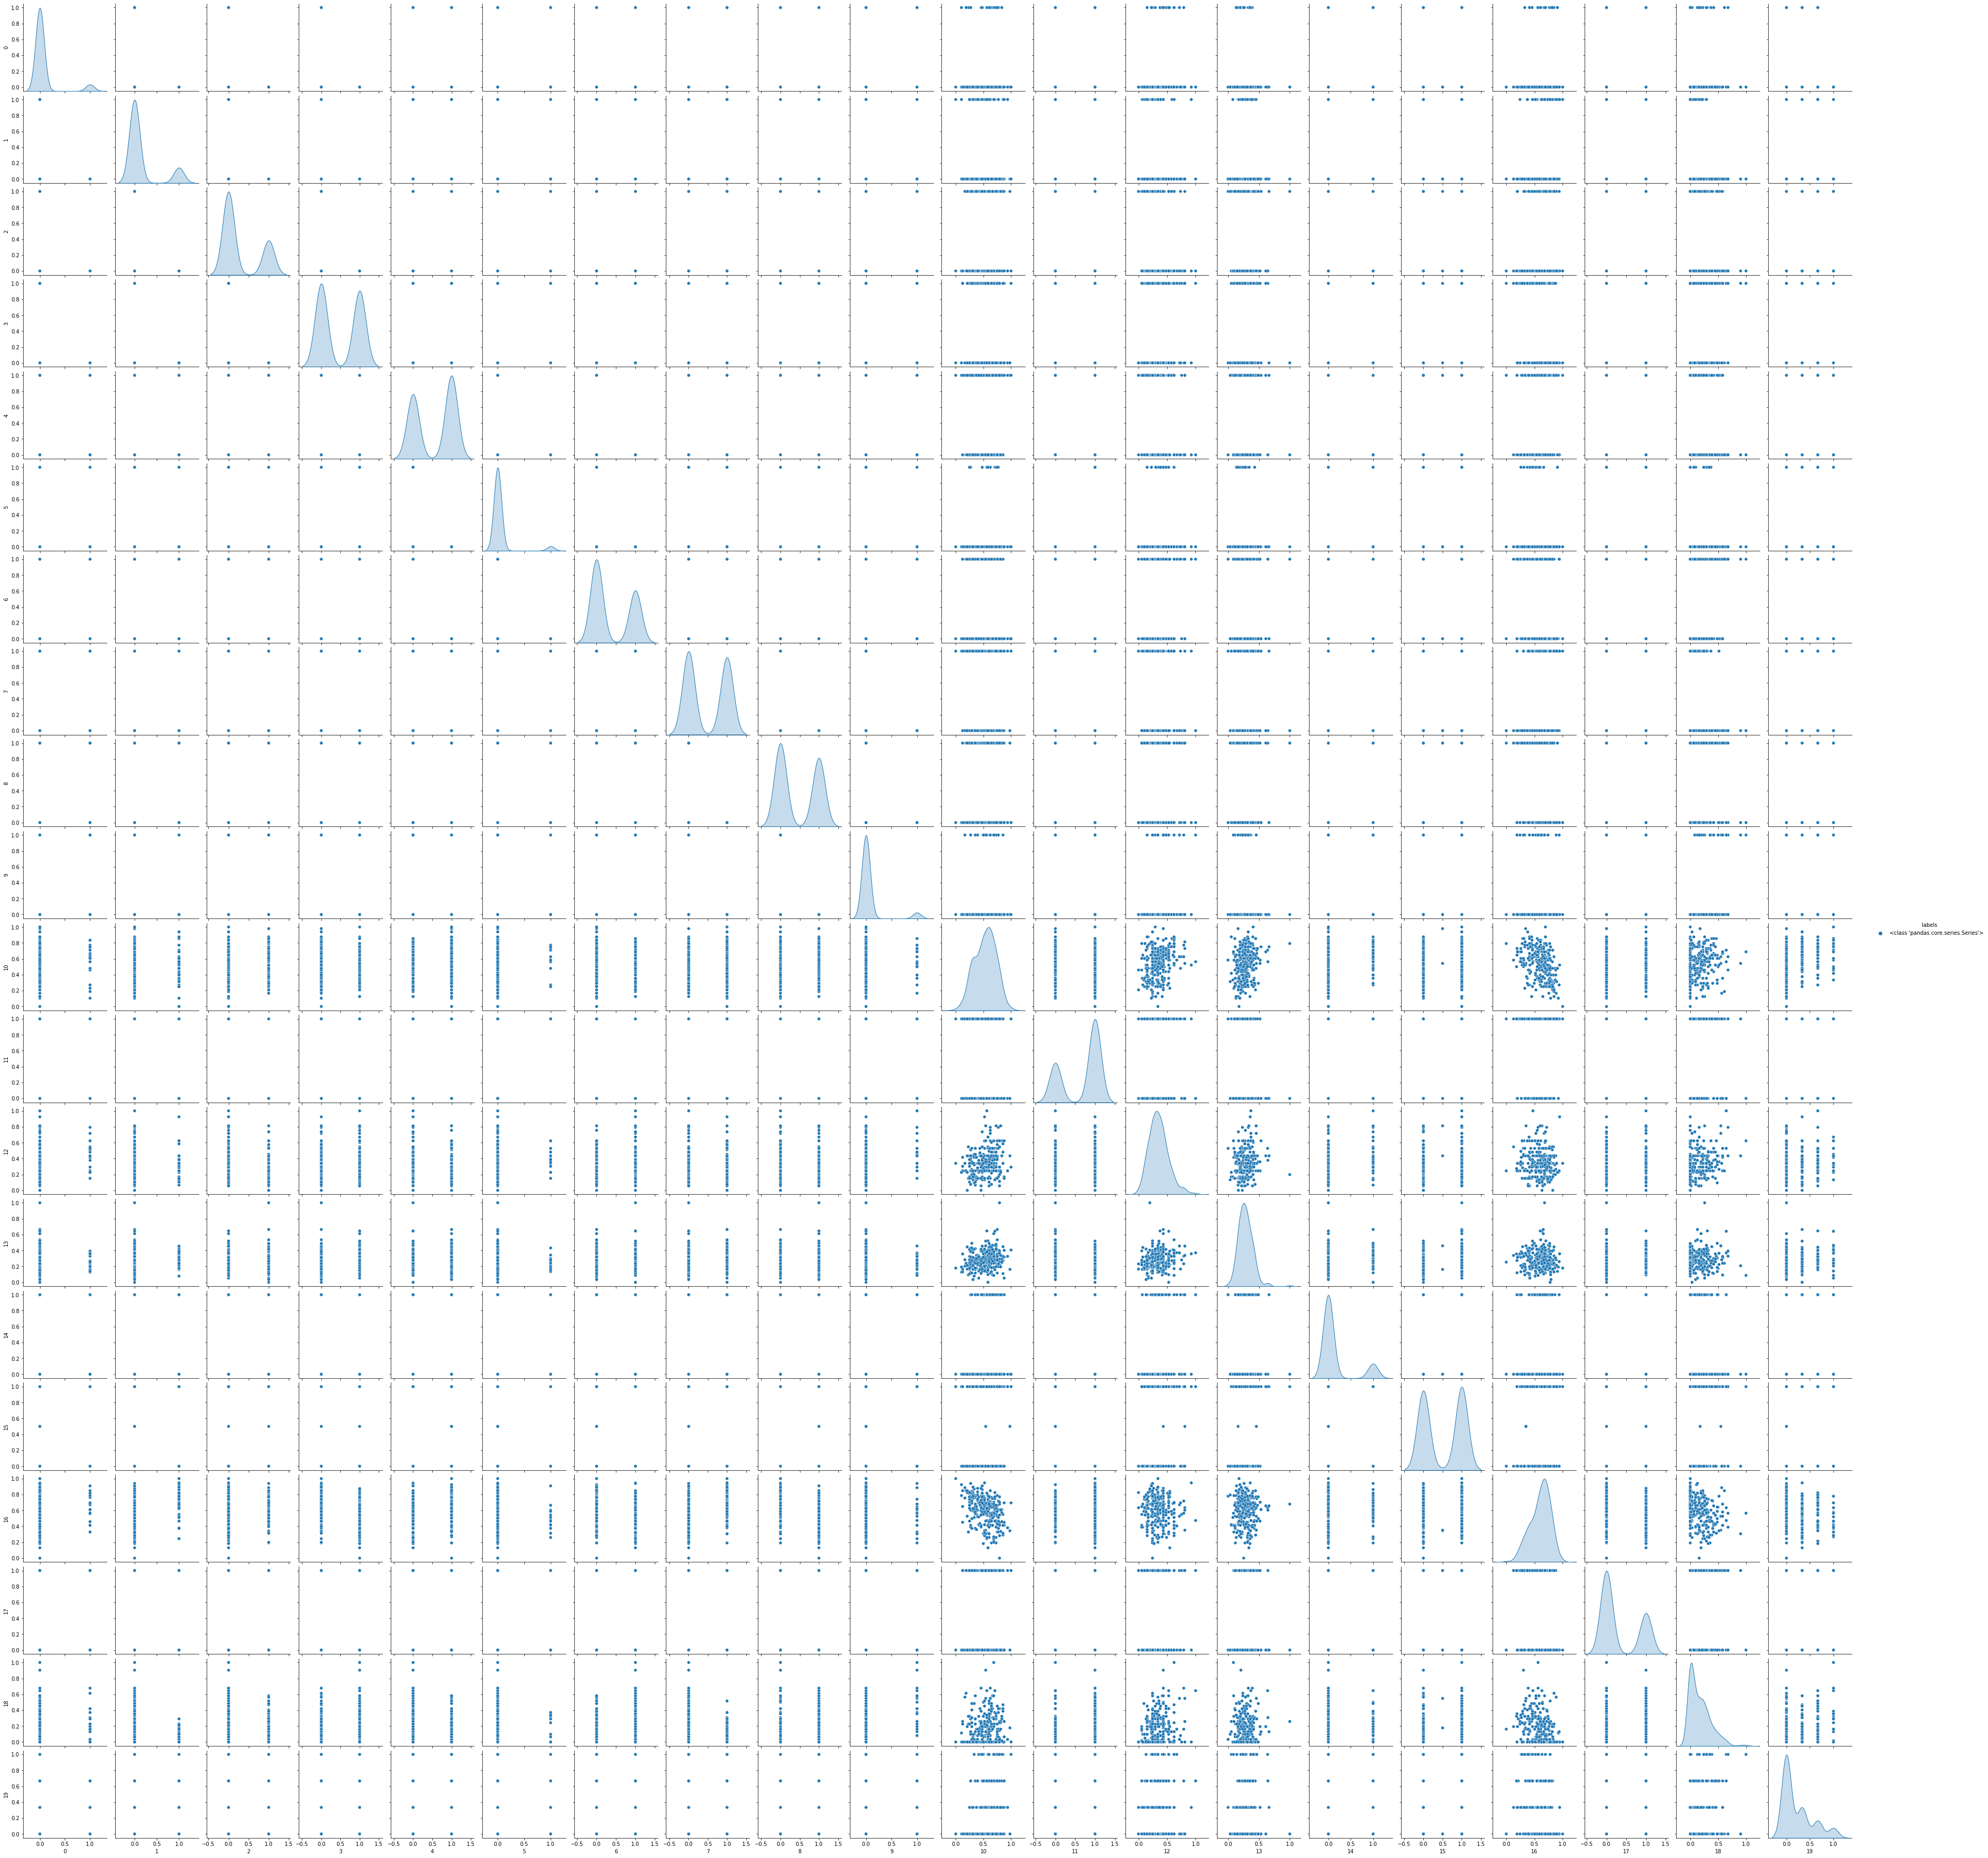

In [279]:
df1['labels'] = pd.Series
import seaborn as sns
sns.pairplot(df1, hue = 'labels')

Performing PSO on Naive Bayes

In [280]:
from sklearn.naive_bayes import GaussianNB 
NB = GaussianNB() 


In [281]:
def f_per_particle(m, alpha):
    total_features = x.shape[1]

    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:, m ==1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.20, random_state=None)
    
    # Perform classification and store performance in P
    
    NB.fit(X_train, y_train)
    P = (NB.predict(X_test) == y_test).mean()
    
    kf = KFold(shuffle=True , n_splits = 5 , random_state=0)
    scores = cross_val_score(NB, X_subset, y, cv=kf, scoring= "roc_auc")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    P = scores.mean()
    
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    

    print("Particle j: ", j)
    return j

In [282]:
def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [283]:
x.shape[0]

270

In [284]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
# Call instance of PSO
dimensions =  X.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles = 270 , dimensions=dimensions,options=options)
# Perform optimization
cost, pos = optimizer.optimize(f, iters=100, verbose=2)


2021-09-21 13:54:24,904 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/100

Accuracy: 0.87 (+/- 0.04)
Particle j:  0.1712143467643467
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.21638479853479842
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.19878009768009766
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.22355042735042735
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1691963064713065
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13482954822954826
Accuracy: 0.82 (+/- 0.16)
Particle j:  0.21513949938949942
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.20029126984126983
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.2228485347985348
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15458296703296692
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.18133339438339433
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.184579822954823
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.1451336385836386
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.19155415140415133
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.21298629426129434
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15952582417582417
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.14454890109890112
Acc

pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.15060323565323577
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727887667887668
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accura

pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.13

Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17246135531135529
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1749916361416361
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.18380451770451778
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.18380451770451778
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1960975579975579
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1960975579975579
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.16093492063492065
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.18380451770451778
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.16859969474969477
Accuracy: 0.85 (+/- 0.04)
Particle j:  0.18787619047619045
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.16509065934065928
Accuracy: 0.85 (+/- 0.04)
Particle j:  0.18787619047619045
Acc

pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.13

Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18608498168498175
Accuracy: 0.85 (+/- 0.04)
Particle j:  0.18787619047619045
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.17335952380952374
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.18380451770451778
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.18736135531135525
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1912559218559219
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.20343693528693535
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1912559218559219
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1912559218559219
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.19925073260073256
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1996376373626373
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1912559218559219
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.20369517704517703
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1912559218559219
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.20369517704517703
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.19421202686202682
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.19421202686202682
Acc

pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.13

Accuracy: 0.84 (+/- 0.11)
Particle j:  0.20369517704517703
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.19421202686202682
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1912559218559219
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1444744200244199
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11895012210012205
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12714761904761895
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13613437118437116
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1313594627594627
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12775183150183156
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.13996043956043952
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.13960805860805867
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.13996043956043952
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11318113553113561
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13613437118437116
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13138113553113553
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13166159951159956
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12714761904761895


pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.113

Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1251800976800977
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1303899267399267
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12714761904761895
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16150732600732604
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1605021367521367
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1537663003663004
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.1487471306471306
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.16174658119658128
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1517015873015874
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15625714285714293
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1537663003663004
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.15695732600732598
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.14131037851037864
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.1487471306471306
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1537663003663004
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15625714285714293
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.1475517704517706
Accurac

pyswarms.discrete.binary:   6%|▌         |6/100, best_cost=0.113

Accuracy: 0.87 (+/- 0.12)
Particle j:  0.15671898656898653
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1605021367521367
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.143096214896215
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.143096214896215
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.143096214896215
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.88 (+/- 0.13)
Particle j:  0.13790641025641032
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1523101953601953
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.143096214896215
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.87 (

pyswarms.discrete.binary:   7%|▋         |7/100, best_cost=0.113

Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.86 (+/- 0.14)
Particle j:  0.1620177045177044
Accuracy: 0.88 (+/- 0.13)
Particle j:  0.13790641025641032
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1483786324786324
Accuracy: 0.84 (+/- 0.19)
Particle j:  0.20788205128205126
Accuracy: 0.85 (+/- 0.18)
Particle j:  0.19102344322344325
Accuracy: 0.89 (+/- 0.11)
Particle j:  0.15984835164835165
Accuracy: 0.85 (+/- 0.14)
Particle j:  0.1978628815628816
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.16555787545787548
Accuracy: 0.87 (+/- 0.15)
Particle j:  0.16321807081807077
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.17195805860805863
Accuracy: 0.87 (+/- 0.15)
Particle j:  0.15075677655677652
Accuracy: 0.86 (+/- 0.16)
Particle j:  0.1788103785103784
Accuracy: 0.86 (+/- 0.17)
Particle j:  0.1690652014652015
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.17239658119658124
Accuracy: 0.85 (+/- 0.17)
Particle j:  0.17928455433455426
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1654044566544567
Accu

pyswarms.discrete.binary:   8%|▊         |8/100, best_cost=0.113


Particle j:  0.1534908424908425
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1649117826617827
Accuracy: 0.87 (+/- 0.14)
Particle j:  0.16322936507936514
Accuracy: 0.86 (+/- 0.14)
Particle j:  0.17325964590964596
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13939297924297916
Accuracy: 0.87 (+/- 0.14)
Particle j:  0.16595586080586083
Accuracy: 0.87 (+/- 0.14)
Particle j:  0.16595586080586083
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.1478881562881563
Accuracy: 0.86 (+/- 0.14)
Particle j:  0.1409268620268621
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.1478881562881563
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.15389102564102564
Accuracy: 0.86 (+/- 0.14)
Particle j:  0.1407318681318682
Accuracy: 0.86 (+/- 0.14)
Particle j:  0.14819065934065945
Accuracy: 0.86 (+/- 0.14)
Particle j:  0.1407318681318682
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.1478881562881563
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.15756916971916965
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.1478881562881563
Accuracy: 0.86 (+/- 0.15)
Parti

pyswarms.discrete.binary:   9%|▉         |9/100, best_cost=0.113

Accuracy: 0.86 (+/- 0.15)
Particle j:  0.15389102564102564
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.1478881562881563
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15145360195360194
Accuracy: 0.87 (+/- 0.03)
Particle j:  0.15215915750915757
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15917582417582418
Accuracy: 0.87 (+/- 0.03)
Particle j:  0.1586838827838829
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.16834627594627605
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15917582417582418
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15917582417582418
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15917582417582418
Accuracy: 0.87 (+/- 0.03)
Particle j:  0.16602448107448117
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16579114774114784
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.18258443223443221
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.16485915750915753
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16560592185592182
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15363998778998766
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15917582417582418

pyswarms.discrete.binary:  10%|█         |10/100, best_cost=0.113

Accuracy: 0.86 (+/- 0.03)
Particle j:  0.17518840048840054
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15363998778998766
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14382423687423684
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13293956043956046
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1351092796092796
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14223266178266192
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14223266178266192
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14223266178266192
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14223266178266192
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14382423687423684
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14223266178266192
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1351092796092796
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14382423687423684
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1351092796092796
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13719529914529927
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1351092796092796
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13719529914529927
A

pyswarms.discrete.binary:  10%|█         |10/100, best_cost=0.113

Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1351092796092796
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14223266178266192
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16010860805860816
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1351092796092796
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15703656898656895
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13719529914529927
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13719529914529927


pyswarms.discrete.binary:  11%|█         |11/100, best_cost=0.113

Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14136648351648357
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13360555555555564
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13360555555555564
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14233064713064708
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.1326607448107448
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14136648351648357
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14136648351648357
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1445811965811966
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14136648351648357
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.12736666666666674
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13768315018315025
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1418335164835165
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13360555555555564
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13360555555555564
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13360555555555564
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14500286935286927
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13360555555555564


pyswarms.discrete.binary:  12%|█▏        |12/100, best_cost=0.113


Particle j:  0.1400946275946276
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.17154609279609276
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.17088821733821735
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.18340757020757018
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16854536019536026
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.18340757020757018
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.16932796092796087
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.17088821733821735
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.1981552503052503
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.18340757020757018
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16854536019536026
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15617582417582407
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.18340757020757018
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16854536019536026
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.18340757020757018
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16854536019536026
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.1657139804639805
Accuracy: 0.89 (+/- 0.05)

pyswarms.discrete.binary:  13%|█▎        |13/100, best_cost=0.113

Accuracy: 0.83 (+/- 0.05)
Particle j:  0.22622152014652003
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.18465341880341876
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1909321123321125
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18201831501831506
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18201831501831506
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.19277478632478628
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 

pyswarms.discrete.binary:  14%|█▍        |14/100, best_cost=0.113

Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18201831501831506
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.185101282051282
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13977631257631262
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.15246788766788757
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.1417318681318682
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16199853479853488
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.15867112332112343
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.15800982905982905
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1660554334554334
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.16277326007326004
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1660554334554334
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.15119352869352876
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.15119352869352876
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1649487179487179
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.15246788766788757
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.15483760683760683
Accur

pyswarms.discrete.binary:  15%|█▌        |15/100, best_cost=0.113


Particle j:  0.15119352869352876
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.1417318681318682
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.15074029304029313
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.14595427350427354
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.15416269841269842
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.1593140415140415
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.15416269841269842
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.1593140415140415
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.1593140415140415
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.1501401098901098
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.15416269841269842
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.15416269841269842
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.1593140415140415
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.15416269841269842
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.14595427350427354
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.15416269841269842
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.15416269841269842
Accuracy: 0.87 (+/- 0.16)
Pa

pyswarms.discrete.binary:  16%|█▌        |16/100, best_cost=0.113


Particle j:  0.15416269841269842
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.16302686202686206
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.14553400488400497
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1409952991452992
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.16277148962148952
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.15601880341880336
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1409952991452992
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1409952991452992
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.1396489010989011
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1409952991452992
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.15601880341880336
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.16277148962148952
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1409952991452992
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.16830409035409047
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.158974358974359
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1409952991452992
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.14120427350427345
Accuracy: 0.88 (+/- 0.08)
Parti

pyswarms.discrete.binary:  17%|█▋        |17/100, best_cost=0.113


Particle j:  0.15601880341880336
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.158974358974359
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1409952991452992
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15281648351648358
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13300659340659332
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.14553400488400497
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15597472527472528
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.16445555555555547
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1437128815628815
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.15489945054945065
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.14989389499389505
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13919621489621486
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.15489945054945065
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.15471648351648354
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.15819694749694757
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13919621489621486
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.16272472527472517
Accuracy: 0.88 (+/- 0.07)


pyswarms.discrete.binary:  18%|█▊        |18/100, best_cost=0.113

Accuracy: 0.89 (+/- 0.07)
Particle j:  0.14989389499389505
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.16445555555555547
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15597472527472528
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.17116971916971913
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.15489945054945065
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13265982905982918
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13291410256410263
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13291410256410263
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.15331788766788756
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.15331788766788756
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.134134004884005
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.1635397435897435
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13453846153846155
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.14563882783882776
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13385927960927968
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.1483096459096458
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.1483422466422467
Ac

pyswarms.discrete.binary:  18%|█▊        |18/100, best_cost=0.113


Particle j:  0.14013705738705745
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13385927960927968
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1401200244200245
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13291410256410263
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12211214896214898
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.1483096459096458
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13291410256410263


pyswarms.discrete.binary:  19%|█▉        |19/100, best_cost=0.113

Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14788028083028093
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.14041898656898652
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.13727667887667877
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14624908424908434
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.11977686202686191
Accuracy: 0.89 (+/- 0.11)
Particle j:  0.13050409035409033
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1412132478632479
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.119709645909646
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1412132478632479
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.13491092796092802
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.14368492063492075
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.134265750915751
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1385324175824177
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.135507326007326
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15632490842490837
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1259969474969475
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13149963369963372
Accurac

pyswarms.discrete.binary:  20%|██        |20/100, best_cost=0.106

Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1397953601953602
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.13927417582417587
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.153872039072039
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15937100122100106
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15937100122100106
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15937100122100106
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.13986825396825395
Accuracy: 0.86 (+/- 0.14)
Particle j:  0.14271825396825383


pyswarms.discrete.binary:  21%|██        |21/100, best_cost=0.113

Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15937100122100106
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16295433455433447
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1255379731379731
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11759584859584862
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1255379731379731
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12026056166056166
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12026056166056166
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1255379731379731
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1255379731379731
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1255379731379731
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1255379731379731
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11353815628815626
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12026056166056166
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11759584859584862
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11759584859584862
Acc

pyswarms.discrete.binary:  22%|██▏       |22/100, best_cost=0.11

Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1255379731379731
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.1502578449328449
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.16093311965811952
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.16093311965811952
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.1735281135531134
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.17628788156288155
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.16248079975579963
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.18988766788766795
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694


pyswarms.discrete.binary:  23%|██▎       |23/100, best_cost=0.106


Particle j:  0.16357667887667893
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.16093311965811952
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.17241144688644694
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1258845543345544
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.12919780219780225
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.12919780219780225
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13765103785103777
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1258845543345544
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12334047619047618
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1258845543345544
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1323619658119659
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1258845543345544
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1258845543345544
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1261757631257631
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1258845543345544
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.12919780219780225
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.12919780219780225
Accuracy: 0.90 (+/- 0.04)
Part

pyswarms.discrete.binary:  24%|██▍       |24/100, best_cost=0.106

Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1323619658119659
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1258845543345544
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1261757631257631
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.15630268620268611
Accuracy: 0.89 (+/- 0.12)
Particle j:  0.14713186813186807
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.1560763125763126
Accuracy: 0.89 (+/- 0.12)
Particle j:  0.14713186813186807
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17729157509157512
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.1560763125763126
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.1560763125763126
Accuracy: 0.89 (+/- 0.12)
Particle j:  0.14713186813186807
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.1560763125763126
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.1560763125763126
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14506074481074482
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.17963028083028093
Accuracy: 0.89 (+/- 0.12)
Particle j:  0.13918168498168487
Accuracy: 0.89 (+/- 0.12)
Particle j:  0.14713186813186807
Accur

pyswarms.discrete.binary:  25%|██▌       |25/100, best_cost=0.106

Accuracy: 0.88 (+/- 0.12)
Particle j:  0.1560763125763126
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.1560763125763126
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.13553510378510392
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.11636752136752142
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.13553510378510392
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12433992673992675
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.11636752136752142
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12740085470085466
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.11636752136752142
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.11636752136752142

pyswarms.discrete.binary:  26%|██▌       |26/100, best_cost=0.106

Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12311770451770443
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12986288156288167
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12986288156288167
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12986288156288167
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15391684981684978
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.14521379731379735
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1507197191697191
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.14521379731379735
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15171092796092783
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.14521379731379735
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.14409065934065934
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.14521379731379735
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15391684981684978
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.14521379731379735
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.1298628815628816

pyswarms.discrete.binary:  27%|██▋       |27/100, best_cost=0.106

Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12986288156288167
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.13696452991452995
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12986288156288167
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.13829963369963358
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.14521379731379735
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15391684981684978
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1252806471306471
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.21609523809523812
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.24769581807081803
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.22198736263736268
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.24631504884004884
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.24631504884004884
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.22106007326007326
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.24631504884004884
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.24631504884004884
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.24631504884004884
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.2416993894993895

pyswarms.discrete.binary:  28%|██▊       |28/100, best_cost=0.106


Particle j:  0.24769581807081803
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12863223443223448
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1398048229548231
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13281611721611722
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12386324786324801
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13910140415140412
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12386324786324801
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12386324786324801
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.1250874236874238
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1395385225885226
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13281611721611722
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.13058278388278388
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12386324786324801
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1398048229548231
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1398048229548231
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12914548229548234
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1398048229548231
Accuracy: 0.90 (+/- 0.05)
Pa

pyswarms.discrete.binary:  29%|██▉       |29/100, best_cost=0.106


Particle j:  0.12386324786324801
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12386324786324801
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12386324786324801
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12386324786324801
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1398048229548231
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.13799871794871796
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13909316239316222
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14324120879120883
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13332148962148957
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13751056166056158
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.13799871794871796
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14324120879120883
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.13665213675213678
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14324120879120883
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.1426327838827839
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13332148962148957
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13332148962148957
Accuracy: 0.88 (+/- 0.09

pyswarms.discrete.binary:  30%|███       |30/100, best_cost=0.106

Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13909316239316222
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13332148962148957
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1327241758241759
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13332148962148957
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14375482295482295
Accuracy: 0.87 (+/- 0.02)
Particle j:  0.1823462759462759
Accuracy: 0.87 (+/- 0.02)
Particle j:  0.1687532356532357
Accuracy: 0.86 (+/- 0.04)
Particle j:  0.1932577533577533
Accuracy: 0.86 (+/- 0.04)
Particle j:  0.1932577533577533
Accuracy: 0.86 (+/- 0.04)
Particle j:  0.1932577533577533
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.193740354090354
Accuracy: 0.85 (+/- 0.05)
Particle j:  0.193740354090354
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.18126025641025645
Accuracy: 0.86 (+/- 0.04)
Particle j:  0.1932577533577533
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.18235628815628807
Accuracy: 0.87 (+/- 0.02)
Particle j:  0.1823462759462759
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.18235628815628807
Accuracy:

pyswarms.discrete.binary:  31%|███       |31/100, best_cost=0.106


Particle j:  0.1823462759462759
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.14656758241758233
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14090073260073255
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.12634835164835173
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.12582667887667895
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13442008547008538
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.1505817460317461
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13442008547008538
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.11237362637362645
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.14312045177045168
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13490054945054944
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13442008547008538
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14090073260073255
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13442008547008538
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13442008547008538
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13442008547008538
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14090073260073255
Accuracy: 0.88 (+/- 0.07

pyswarms.discrete.binary:  32%|███▏      |32/100, best_cost=0.106

Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14090073260073255
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14090073260073255
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13442008547008538
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15496831501831498
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15147869352869353
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15496831501831498
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15496831501831498
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15693766788766794
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.16217405372405375
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.17010793650793657
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16392173382173375
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15496831501831498
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.16635488400488394
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.16516330891330896
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.16045183150183148
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15496831501831498
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.151478693528693

pyswarms.discrete.binary:  33%|███▎      |33/100, best_cost=0.106

Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15496831501831498
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12689511599511613
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12897844932844926
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1222587301587302
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12897844932844926
Accuracy: 0.89 (+/- 0.11)
Particle j:  0.11854224664224663
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12040317460317473
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.11478614163614162
Accuracy: 0.89 (+/- 0.11)
Particle j:  0.12428956043956042
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1222587301587302
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.12174474969474958
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.12174474969474958
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12897844932844926
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12689511599511613
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.12628919413919423
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.1198083638583639
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.13400335775335787


pyswarms.discrete.binary:  34%|███▍      |34/100, best_cost=0.106


Particle j:  0.12689511599511613
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1222587301587302
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.19160415140415132
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.17877741147741147
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.19214194139194135
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.19214194139194135
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.17487936507936513
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.18760915750915744
Accuracy: 0.86 (+/- 0.02)
Particle j:  0.19521804029304035
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1838023199023199
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.19214194139194135
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.1648082417582418
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.1887554945054945
Accuracy: 0.85 (+/- 0.02)
Particle j:  0.19429572649572666
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.16688870573870573
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.18070106837606836
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.19214194139194135
Accuracy: 0.86 (+/- 0.03)


pyswarms.discrete.binary:  35%|███▌      |35/100, best_cost=0.106

Accuracy: 0.85 (+/- 0.02)
Particle j:  0.19429572649572666
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.17035463980463988
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.16838296703296707
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.1927663614163613
Accuracy: 0.86 (+/- 0.02)
Particle j:  0.19521804029304035
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1601546398046398
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13850769230769228
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16293418803418797
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15196251526251545
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.15185195360195353
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15196251526251545
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.15763186813186808
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.14617899877899876
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.1524813186813187
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.15185195360195353
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.1546351037851038
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14861111111111105
A

pyswarms.discrete.binary:  36%|███▌      |36/100, best_cost=0.106

Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15196251526251545
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1370152014652014
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13002112332112326
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1614429792429793
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.16293418803418797
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.1593697191697192
Accuracy: 0.85 (+/- 0.04)
Particle j:  0.1919357142857143
Accuracy: 0.90 (+/- 0.10)
Particle j:  0.14308992673992665
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16442167277167286
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16442167277167286
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16442167277167286
Accuracy: 0.90 (+/- 0.10)
Particle j:  0.14308992673992665
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16442167277167286
Accuracy: 0.90 (+/- 0.10)
Particle j:  0.14308992673992665
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16442167277167286
Accuracy: 0.90 (+/- 0.10)
Particle j:  0.14308992673992665
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16442167277167286
A

pyswarms.discrete.binary:  37%|███▋      |37/100, best_cost=0.106

Accuracy: 0.89 (+/- 0.10)
Particle j:  0.1593697191697192
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16442167277167286
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16442167277167286
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.18779090354090344
Accuracy: 0.90 (+/- 0.10)
Particle j:  0.14308992673992665
Accuracy: 0.90 (+/- 0.10)
Particle j:  0.14308992673992665
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15628870573870562
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14882741147741158
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.12866660561660564
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1296117826617827
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13286935286935295
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.12866660561660564
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.12866660561660564
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.143067216117216
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.120949938949939
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14510518925518923
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12902631257631256
Acc

pyswarms.discrete.binary:  38%|███▊      |38/100, best_cost=0.106


Particle j:  0.12902631257631256
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12902631257631256
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14510518925518923
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1285838217338216
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12255909645909653
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12255909645909653
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1211031746031746
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12256825396825403
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12256825396825403
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1251264957264958
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1312686202686203
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12256825396825403
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12256825396825403
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13042326007326002
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12256825396825403
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12256825396825403
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11794188034188045
Accuracy: 0.89 (+/- 0.04)


pyswarms.discrete.binary:  39%|███▉      |39/100, best_cost=0.106

Particle j:  0.12256825396825403
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18779108669108663
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18779108669108663
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.19294609279609273
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.17760451770451766
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.1817964590964591
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18132710622710604
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.1597392551892552
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.15402649572649574
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.1817964590964591
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18132710622710604
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.1823658119658119
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18132710622710604
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18779108669108663
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.17334896214896212
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.1884372100122099
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18580738705738695
Accuracy: 0.86 (+/- 0.05)
Pa

pyswarms.discrete.binary:  40%|████      |40/100, best_cost=0.106

Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18132710622710604
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.18132710622710604
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.1817964590964591
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.160735347985348
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.160735347985348
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16646886446886455
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.16743553113553114
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.160735347985348
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16646886446886455
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16646886446886455
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16646886446886455
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16646886446886455
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16646886446886455
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.160735347985348
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.17291349206349205
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.160735347985348
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1717021978021978
Accuracy:

pyswarms.discrete.binary:  41%|████      |41/100, best_cost=0.106

Accuracy: 0.86 (+/- 0.08)
Particle j:  0.16743553113553114
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.16743553113553114
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16646886446886455
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15682222222222209
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.12227435897435891
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15285573870573868
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.1286725885225885
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13517222222222225
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.140472039072039
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13960946275946282
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.12511288156288158
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15127918192918194
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.15164444444444444
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.1286725885225885
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13848833943833952
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14487277167277163
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15682222222222209
A

pyswarms.discrete.binary:  42%|████▏     |42/100, best_cost=0.106

Accuracy: 0.88 (+/- 0.06)
Particle j:  0.1286725885225885
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.12250805860805862
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1502014041514042
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13579603174603183
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1280874236874237
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.12967612942612944
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12619432234432237
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.1193401098901099
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1280874236874237
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.11995946275946275
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.12392289377289376
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.11298150183150191
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.1193401098901099
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.1193401098901099
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.1193401098901099
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13579603174603183
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12782649572649565
Accur

pyswarms.discrete.binary:  43%|████▎     |43/100, best_cost=0.106


Particle j:  0.1280874236874237
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1280874236874237
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1280874236874237
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1280874236874237
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11210427350427347
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1196315018315019
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13196111111111114
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13196111111111114
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
P

pyswarms.discrete.binary:  44%|████▍     |44/100, best_cost=0.11

Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.12204658119658128
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13231288156288157
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.132971855921856
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1379691697191697
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.13823278388278387
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.13497973137973146
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1294741758241758
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.13497973137973146
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.1349550061050062
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.1407297313797314
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.1349550061050062
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.1329576923076924
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12621880341880354
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12655750915750913
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.13497973137973146
Accur

pyswarms.discrete.binary:  45%|████▌     |45/100, best_cost=0.106

Accuracy: 0.88 (+/- 0.09)
Particle j:  0.132971855921856
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.132971855921856
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1366014041514041
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.12348223443223452
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.12348223443223452
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.13586941391941387
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13019658119658117
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.13586941391941387
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.1287376068376067
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1364803418803418
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13522686202686185
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12409334554334564
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.1287376068376067
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.12348223443223452
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.12348223443223452
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.12348223443223452
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.1287376068376067
Accura

pyswarms.discrete.binary:  46%|████▌     |46/100, best_cost=0.106


Particle j:  0.12348223443223452
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.12348223443223452
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.12348223443223452
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.17814212454212458
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1693763736263735
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15923962148962156
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.16282667887667884
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15315140415140419
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14712454212454218
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14712454212454218
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.17814212454212458
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694
Accuracy: 0.87 (+/- 0.10)
Par

pyswarms.discrete.binary:  46%|████▌     |46/100, best_cost=0.106


Particle j:  0.15923962148962156
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15923962148962156
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15923962148962156
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15923962148962156
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1675028693528694


pyswarms.discrete.binary:  47%|████▋     |47/100, best_cost=0.106

Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12066984126984136
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10739566544566552
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12066984126984136
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.1134445665445665
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.11478614163614162
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.11940067155067155
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.12118382173382168
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.11341733821733821
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12066984126984136
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.1134445665445665
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1264144688644689
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.11939047619047626


pyswarms.discrete.binary:  48%|████▊     |48/100, best_cost=0.106


Particle j:  0.11440909645909642
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10739566544566552
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.12118382173382168
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13037289377289374
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13803449328449335
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.14798485958485957
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13803449328449335
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13721019536019535
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12945463980463967
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1423255189255189
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1423255189255189
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.14560885225885217
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14632319902319893
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1423255189255189
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12945463980463967
Accuracy: 0.89 (+/- 0.05)

pyswarms.discrete.binary:  49%|████▉     |49/100, best_cost=0.106

Accuracy: 0.89 (+/- 0.08)
Particle j:  0.1428270451770452
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1271650183150184
Accuracy: 0.90 (+/- 0.09)
Particle j:  0.13420927960927964
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.1508908424908425
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.1508908424908425
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1263667887667887
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15347649572649577
Accuracy: 0.88 (+/- 0.12)
Particle j:  0.13796214896214892
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.11939316239316242
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1263667887667887
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1427103785103786
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.1301315018315019
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13827148962148963
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13378205128205128
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11878760683760688
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.13560714285714276
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.1350766788766789
Accura

pyswarms.discrete.binary:  50%|█████     |50/100, best_cost=0.106

Particle j:  0.1301315018315019
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13932667887667893
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.1301315018315019
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13378205128205128
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12785427350427359
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.18336074481074482
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.19229175824175831
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.18336074481074482
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1827274114774115
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.17271398046398043
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1827274114774115
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.17551593406593405
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16806037851037853
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.19100109890109904
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.19229175824175831
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.18115897435897443
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1827274114774115
Accuracy: 0.86 (+/- 0.10)
Pa

pyswarms.discrete.binary:  51%|█████     |51/100, best_cost=0.106

Accuracy: 0.86 (+/- 0.12)
Particle j:  0.19229175824175831
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.17189633699633688
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.16621568986568985
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.17196086691086693
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.16621568986568985
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.16621568986568985
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.1737977716727716
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.16956227106227093
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.17196086691086693
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.16956227106227093
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1781762820512819
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.1737977716727716
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.16621568986568985
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.16621568986568985
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.17196086691086693
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.16621568986568985
Accuracy: 0.88 (+/- 0.02)
Particle j:  0.16621568986568985


pyswarms.discrete.binary:  52%|█████▏    |52/100, best_cost=0.106

Accuracy: 0.87 (+/- 0.05)
Particle j:  0.16956227106227093
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.129193894993895
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.1376250915750915
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12696343101343097
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.129193894993895
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.13135305250305251
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Ac

pyswarms.discrete.binary:  53%|█████▎    |53/100, best_cost=0.107


Particle j:  0.12243583638583647
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.12243583638583647
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12056269841269833
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11034334554334563
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11034334554334563
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10739566544566552
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11711483516483519
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12066984126984136
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.11884603174603167
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11034334554334563
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.11440909645909642
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11034334554334563
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11034334554334563
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11168150183150181
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12066984126984136
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11711483516483519
Accuracy: 0.91 (+/- 0.

pyswarms.discrete.binary:  54%|█████▍    |54/100, best_cost=0.105


Particle j:  0.10581575091575093
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.10581575091575093
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11034334554334563
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1301344322344323
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1301344322344323
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1301344322344323
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.13175555555555551
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1362053724053725
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13425305250305247
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.14300213675213672
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1301344322344323
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1301344322344323
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13711507936507927
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13711507936507927
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1301344322344323
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13425305250305247
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.14300213675213672
Accuracy: 0.89 (+/- 0.09)
Par

pyswarms.discrete.binary:  55%|█████▌    |55/100, best_cost=0.105


Particle j:  0.1301344322344323
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1301344322344323
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1301344322344323
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1404007326007326
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.1562188034188034
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1544799145299145
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.1489714896214896
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.1562188034188034
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.15376843711843707
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.16149102564102574
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1655241758241758
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.16149102564102574
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1583015873015874
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.16149102564102574
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1477876068376069
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1544799145299145
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1655241758241758
Accuracy: 0.86 (+/- 0.12)
Particle 

pyswarms.discrete.binary:  56%|█████▌    |56/100, best_cost=0.105

Accuracy: 0.87 (+/- 0.13)
Particle j:  0.15258455433455434
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.1583015873015874
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.14086269841269847
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13112936507936512
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13441788766788776
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.16495140415140405
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.17154200244200246
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.14740354090354094
Accuracy: 0.87 (+/- 0.13)
Particle j:  0.1759617826617827
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.14086269841269847
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.164890293040293
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13967826617826623
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1416401098901099
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1718159340659341
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.15890409035409042
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.16394743589743585
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.20046727716727722
Acc

pyswarms.discrete.binary:  57%|█████▋    |57/100, best_cost=0.105


Particle j:  0.2017420024420024
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13441788766788776
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1321015873015874
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14008455433455447
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.14008455433455447
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.126129181929182
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13115085470085466
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.126129181929182
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12823473748473746
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.126129181929182
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13115085470085466
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.126129181929182
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1321015873015874
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13115085470085466
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1321015873015874
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.126129181929182
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13115085470085466
Accuracy: 0.90 (+/- 0.06)
Particle j

pyswarms.discrete.binary:  58%|█████▊    |58/100, best_cost=0.105


Particle j:  0.126129181929182
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1321015873015874
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13115085470085466
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.15517741147741154
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1557506105006104
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.16640842490842506
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14909194139194132
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.15394139194139192
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.14509444444444441
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14472973137973144
Accuracy: 0.89 (+/- 0.11)
Particle j:  0.15146520146520134
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14916361416361415
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13909694749694745
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.14509444444444441
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.16640842490842506
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.15517741147741154
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13675732600732593
Accuracy: 0.90 (+/- 0.04)


pyswarms.discrete.binary:  59%|█████▉    |59/100, best_cost=0.105

Accuracy: 0.89 (+/- 0.04)
Particle j:  0.16624963369963366
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14732545787545784
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14486452991452997
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14732545787545784
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15602045177045165
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.1609532356532357
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15602045177045165
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15787814407814407
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16195396825396835
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15602045177045165
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.1314576923076924
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1617534188034188
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.1360076923076924
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15503925518925518
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.15503925518925518
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.15346489621489615
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14486452991452997
A

pyswarms.discrete.binary:  60%|██████    |60/100, best_cost=0.105


Particle j:  0.15602045177045165
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15602045177045165
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15602045177045165
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.15346489621489615
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.11414548229548244
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.11416501831501832
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.12451465201465209
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.11414548229548244
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14786916971916975
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.12315354090354096
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.12451465201465209
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11552057387057375
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11494352869352865
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14773461538461546
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.12315354090354096
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.12315354090354096
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1265241758241758
Accuracy: 0.91 (+/- 0.0

pyswarms.discrete.binary:  61%|██████    |61/100, best_cost=0.105

Accuracy: 0.87 (+/- 0.06)
Particle j:  0.1496555555555556
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.12451465201465209
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.12315354090354096
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.147062026862027
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11494352869352865
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13042918192918201
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.13626092796092787
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.1434777777777777
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
A

pyswarms.discrete.binary:  62%|██████▏   |62/100, best_cost=0.106


Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14254731379731367
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13706288156288143
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13706288156288143
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13281288156288157
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13281288156288157
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1434197802197803
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13706288156288143
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12880964590964597
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12880964590964597
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13706288156288143
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12880964590964597
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13706288156288143
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13706288156288143
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13706288156288143
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12880964590964597
Accuracy: 0.90 (+/- 0.0

pyswarms.discrete.binary:  63%|██████▎   |63/100, best_cost=0.105

Accuracy: 0.90 (+/- 0.06)
Particle j:  0.13706288156288143
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.166907387057387
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17738589743589744
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.16113247863247865
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.17991654456654457
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17738589743589744
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.14903730158730152
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.17991654456654457
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.19115189255189263
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17738589743589744
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.166907387057387
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17738589743589744
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17738589743589744
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.17991654456654457
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.17991654456654457
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.16113247863247865
Accuracy: 0.86 (+/- 0.05)
Particle j:  0.166907387057387
Acc

pyswarms.discrete.binary:  64%|██████▍   |64/100, best_cost=0.106


Particle j:  0.17738589743589744
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14094389499389492
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15408528693528684
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15408528693528684
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.1473354700854701
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14094389499389492
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.15226611721611719
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.15226611721611719
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.15226611721611719
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.0

pyswarms.discrete.binary:  65%|██████▌   |65/100, best_cost=0.106

Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14094389499389492
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14084120879120865
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13298150183150176
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.1252644688644689
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12165445665445668
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.1252644688644689
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1224847374847375
Accuracy: 0.89 (+/- 0.08)
Particle

pyswarms.discrete.binary:  66%|██████▌   |66/100, best_cost=0.106

Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14785140415140421
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15323333333333328
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14404084249084242
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.13926056166056178
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.13926056166056178
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14404084249084242
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14404084249084242
Accuracy: 0.87 (+/- 0.12)
Particle j:  0.14505213675213674
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14404084249084242
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.14376843711843712
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14404084249084242
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15753278388278377
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14404084249084242
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.15000427350427353
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.13926056166056178
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14785140415140421
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.157532783882783

pyswarms.discrete.binary:  67%|██████▋   |67/100, best_cost=0.105


Particle j:  0.14404084249084242
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15323333333333328
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.1489808302808302
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.1489808302808302
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14404084249084242
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10066770451770457
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10066770451770457
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12070286935286931
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.10268992673992672
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.10746501831501837
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.10268992673992672
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.10202326007326011
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10544261294261291
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12070286935286931
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10737899877899877
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12070286935286931
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.108901221001221
Accuracy: 0.91 (+/- 0.04)


pyswarms.discrete.binary:  67%|██████▋   |67/100, best_cost=0.0979

Accuracy: 0.91 (+/- 0.03)
Particle j:  0.10268992673992672
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10066770451770457
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.10268992673992672
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10594279609279604
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.11536166056166054
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.10268992673992672


pyswarms.discrete.binary:  68%|██████▊   |68/100, best_cost=0.0979

Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1427763736263735
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1478148962148961
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1427763736263735
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.1479650793650793
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1427763736263735
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.15062655677655667
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1478148962148961
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1427763736263735
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.15321526251526246
Accu

pyswarms.discrete.binary:  69%|██████▉   |69/100, best_cost=0.101


Particle j:  0.15321526251526246
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1272383394383395
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12716269841269848
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13904084249084236
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1288299145299145
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13904084249084236
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13904084249084236
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12716269841269848
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12016593406593415
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.13571862026862028
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11832435897435899
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13904084249084236
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1288299145299145
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13904084249084236
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1272383394383395
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13904084249084236
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.12687362637362654
Accuracy: 0.89 (+/- 0.07)


pyswarms.discrete.binary:  70%|███████   |70/100, best_cost=0.0979

Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13904084249084236
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12016593406593415
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1288299145299145
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.13904084249084236
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1726467643467644
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1726467643467644
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1742802808302808
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1726467643467644
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.15210891330891316
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1726467643467644
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.15210891330891316
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1558951159951159
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1742802808302808
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.15210891330891316
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1742802808302808
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1726467643467644
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1726467643467644
Accuracy

pyswarms.discrete.binary:  71%|███████   |71/100, best_cost=0.0979

Accuracy: 0.88 (+/- 0.03)
Particle j:  0.1726467643467644
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1742802808302808
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1742802808302808
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1742802808302808
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12440909645909648
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.13014548229548228
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.13014548229548228
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11441159951159965
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11441159951159965
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12440909645909648
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
A

pyswarms.discrete.binary:  72%|███████▏  |72/100, best_cost=0.101

 0.12440909645909648
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.13014548229548228
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12740085470085466
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12115622710622728
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.15187527472527462
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.1688506105006104
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1889448717948718
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16154517704517712
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.15129877899877897
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.16649358974358983
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1779995115995115
Accuracy: 0.89 (+/- 0.02)
Particle j:  0.1511526862026863
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.17832264957264954
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.18523070818070814
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1568562881562881
Accuracy: 0.88 (+/- 0.03)
Particle j:  0

pyswarms.discrete.binary:  73%|███████▎  |73/100, best_cost=0.0979


Particle j:  0.17832264957264954
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1130320512820512
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.11948260073260077
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.11948260073260077
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1130320512820512
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1130320512820512
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13268833943833935
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1130320512820512
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.11852918192918192
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.12440500610500624
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1269437118437118
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1269437118437118
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13268833943833935
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13268833943833935
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13268833943833935
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1393302808302807
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.11948260073260077
Accuracy: 0.88 (+/- 0.08)
Par

pyswarms.discrete.binary:  74%|███████▍  |74/100, best_cost=0.0979

Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13268833943833935
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.11948260073260077
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13268833943833935
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.11948260073260077
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.11974010989010984
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.11974010989010984
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12315677655677652
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.11841520146520146
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.11974010989010984
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12240372405372417
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12341233211233214
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.118140109890109

pyswarms.discrete.binary:  75%|███████▌  |75/100, best_cost=0.101


Particle j:  0.11974010989010984
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.11841520146520146
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11814010989010983
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1509291819291819
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1509291819291819
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13978492063492065
Accuracy: 0.89 (+/- 0.11)
Particle j:  0.1296499389499391
Accuracy: 0.89 (+/- 0.10)

pyswarms.discrete.binary:  76%|███████▌  |76/100, best_cost=0.101


Particle j:  0.1509291819291819
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13111465201465214
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.15908992673992683
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.15039224664224668
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.15039224664224668
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.0

pyswarms.discrete.binary:  77%|███████▋  |77/100, best_cost=0.101


Particle j:  0.14664511599511612
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1244947496947497
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12838400488400498
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12960354090354087
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12838400488400498
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.1244947496947497
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13607612942612946
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12960354090354087
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13607612942612946
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.90 (+/- 0.06

pyswarms.discrete.binary:  78%|███████▊  |78/100, best_cost=0.0979


Particle j:  0.12289206349206344
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12960354090354087
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12960354090354087
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12289206349206344
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12490372405372402
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.13663150183150186
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12490372405372402
Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13463687423687432
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.14575158730158738
Accuracy: 0.91 (+/- 0.07)
Particle j:  0.13745586080586086
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12490372405372402
Accuracy: 0.88 (+/- 0.11)
Particle j:  0.14575158730158738
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12490372405372402
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.13663150183150186
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12490372405372402
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.12547808302808308
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12490372405372402
Accuracy: 0.90 (+/- 0.

pyswarms.discrete.binary:  79%|███████▉  |79/100, best_cost=0.0979


Particle j:  0.13663150183150186
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.13663150183150186
Accuracy: 0.91 (+/- 0.06)
Particle j:  0.12490372405372402
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1945061660561661
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.1649495115995115
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17904682539682532
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.1649495115995115
Accuracy: 0.85 (+/- 0.04)
Particle j:  0.185763492063492
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17645293040293047
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.2124973748473749
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17904682539682532
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.1649495115995115
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17645293040293047
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.2078979242979244
Accuracy: 0.86 (+/- 0.04)
Particle j:  0.17389700854700857
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17904682539682532
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17645293040293047
Accuracy: 0.85 (+/- 0.03)
Part

pyswarms.discrete.binary:  80%|████████  |80/100, best_cost=0.101


Particle j:  0.17645293040293047
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.1649495115995115
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17645293040293047
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17904682539682532
Accuracy: 0.86 (+/- 0.03)
Particle j:  0.1649495115995115
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13942649572649557
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13012148962148956
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13760750915750916
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.13827002442002453
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13696520146520147
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1310478021978022
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13942649572649557
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.1419897435897436
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13760750915750916
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13942649572649557
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13760750915750916
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13696520146520147
Accuracy: 0.89 (+/- 0.08)


pyswarms.discrete.binary:  81%|████████  |81/100, best_cost=0.0979

Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12567380952380947
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.13760750915750916
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13696520146520147
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11217612942612946
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.10666770451770456
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.1293239926739927
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11369566544566545
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12240750915750918
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11369566544566545
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11217612942612946
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12160213675213677
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11513223443223439
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11338724053724052
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.11513223443223439
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11369566544566545
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11217612942612946
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.1224075091575091

pyswarms.discrete.binary:  82%|████████▏ |82/100, best_cost=0.0979


Particle j:  0.12240750915750918
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17670366300366308
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.15335073260073254
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1704228327228327
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1742975579975579
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15851739926739927
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.1521421245421246
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15710006105006097
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.15335073260073254
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1704228327228327
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15756471306471304
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15002295482295472
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15349804639804634
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.15335073260073254
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.1521421245421246
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.17771959706959706
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.17670366300366308
Accuracy: 0.86 (+/- 0.09)
P

pyswarms.discrete.binary:  83%|████████▎ |83/100, best_cost=0.0979


Particle j:  0.1704228327228327
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.17245579975579978
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.14323492063492066
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13720177045177046
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14948186813186817
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.13967704517704524
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.13595750915750918
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.14323492063492066
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13720177045177046
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.14323492063492066
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14948186813186817
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14542936507936502
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14948186813186817
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13720177045177046
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13720177045177046
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13720177045177046
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13720177045177046
Accuracy: 0.88 (+/- 0.0

pyswarms.discrete.binary:  84%|████████▍ |84/100, best_cost=0.101


Particle j:  0.14323492063492066
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13720177045177046
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.13595750915750918
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14119444444444457
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.14618620268620275
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13743583638583634
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14119444444444457
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.14618620268620275
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14119444444444457
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.15199157509157507
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14119444444444457
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14119444444444457
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.14618620268620275
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.14369694749694745
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.15139981684981674
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.14618620268620275
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.14618620268620275
Accuracy: 0.90 (+/- 0.

pyswarms.discrete.binary:  85%|████████▌ |85/100, best_cost=0.0979


Particle j:  0.13172222222222224
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.1439523199023199
Accuracy: 0.90 (+/- 0.09)
Particle j:  0.133156043956044
Accuracy: 0.90 (+/- 0.09)
Particle j:  0.133156043956044
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1318341880341881
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.14548473748473742
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14524529914529904
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14524529914529904
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14524529914529904
Accuracy: 0.90 (+/- 0.09)
Particle j:  0.133156043956044
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1318341880341881
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14524529914529904
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1318341880341881
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1341537240537241
Accuracy: 0.90 (+/- 0.09)
Particle j:  0.133156043956044
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1341537240537241
Accuracy: 0.90 (+/- 0.08)
Particle j:  0.14548473748473742
Accuracy: 0.90 (+/- 0.09)
Particle j

pyswarms.discrete.binary:  86%|████████▌ |86/100, best_cost=0.0979


Particle j:  0.1341537240537241
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.14664871794871798
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1318341880341881
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1341537240537241
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.1367933455433456
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.12038168498168501
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.12463150183150176
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.1355931623931623
Accuracy: 0.90 (+/- 0.09)
Particle j:  0.12161251526251525
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13734316239316227
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.13593778998779
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.1497216727716727
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14100427350427347
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.11952612942612935
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.11986483516483523
Accuracy: 0.90 (+/- 0.09)
Particle j:  0.1278540903540903
Accuracy: 0.88 (+/- 0.10)
Particle j:  0.13593778998779
Accuracy: 0.90 (+/- 0.09)
Particle 

pyswarms.discrete.binary:  87%|████████▋ |87/100, best_cost=0.0979

Accuracy: 0.89 (+/- 0.10)
Particle j:  0.13547649572649575
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1305161172161172
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.1305161172161172
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.1487326007326007
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.13976092796092798
Accuracy: 0.90 (+/- 0.02)
Particle j:  0.13731037851037844
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16247728937728934
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.14287759462759467
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15527905982905987
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.1487326007326007
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.14221935286935283
Accuracy: 0.88 (+/- 0.07)
Particle j:  0.1487326007326007
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16247728937728934
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.14221935286935283
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16247728937728934
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13004658119658122
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14024945054945054
Ac

pyswarms.discrete.binary:  88%|████████▊ |88/100, best_cost=0.0979

Accuracy: 0.88 (+/- 0.06)
Particle j:  0.14221935286935283
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16247728937728934
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.14221935286935283
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.13004658119658122
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12579890109890102
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.14951526251526243
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15472460317460318
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.13789212454212452
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.13789212454212452
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12248333333333333
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1133214896214897
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.12351361416361425
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11681611721611725
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12248333333333333
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.13789212454212452
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1133214896214897
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1133214896214897


pyswarms.discrete.binary:  89%|████████▉ |89/100, best_cost=0.0979


Particle j:  0.1133214896214897
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1133214896214897
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1133214896214897
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.1133214896214897
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12248333333333333
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11505122100122107
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.1152504884004884
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11505122100122107
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.12038400488400483
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.91 (+/- 0.05)
P

pyswarms.discrete.binary:  90%|█████████ |90/100, best_cost=0.0979

Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11505122100122107
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11505122100122107
Accuracy: 0.91 (+/- 0.05)
Particle j:  0.11438937728937722
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1330494505494504
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1330494505494504
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13451129426129427
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1330494505494504
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13732167277167265
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1330494505494504
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1330494505494504
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1330494505494504
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13451129426129427
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1390245421245421
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13451129426129427
Accuracy: 0.88 (+/- 0.06)
Particle j:  0.13597490842490856
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1330494505494504
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1330494505494504
Accura

pyswarms.discrete.binary:  91%|█████████ |91/100, best_cost=0.0979

Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12311343101343104
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12311343101343104
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12798028083028085
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12311343101343104
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12577472527472522
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.91 (+/- 0.02)
Particle j:  0.12481880341880332
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.12798028083028085
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12311343101343104
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12311343101343104
Accur

pyswarms.discrete.binary:  92%|█████████▏|92/100, best_cost=0.0979

Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12173296703296695
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.12173296703296695
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.03)
Particle j:  0.1205107448107449
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13276324786324784
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14098028083028075
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13276324786324784
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.13155177045177038
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13276324786324784
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13276324786324784
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13276324786324784
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13634584859584853
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13276324786324784
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13696306471306463
Ac

pyswarms.discrete.binary:  93%|█████████▎|93/100, best_cost=0.101


Particle j:  0.13276324786324784
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13276324786324784
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.10894102564102572
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.11293223443223457
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12195213675213684
Accuracy: 0.90 (+/- 0.05)
Particle j:  0.11456019536019527
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.10894102564102572
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11494352869352865
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.11293223443223457
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11494352869352865
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12195213675213684
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.11293223443223457
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.12195213675213684
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11494352869352865
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11494352869352865
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.10894102564102572
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.10894102564102572
Accuracy: 0.89 (+/- 0.

pyswarms.discrete.binary:  94%|█████████▍|94/100, best_cost=0.101


Particle j:  0.11494352869352865
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.10894102564102572
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11494352869352865
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.10642148962148956
Accuracy: 0.90 (+/- 0.06)
Particle j:  0.11494352869352865
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.13608388278388278
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13305213675213673
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.13194676434676444
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.14112777777777777
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.88 (+/- 0.03)
Particle j:  0.13928980463980456
Accuracy: 0.89 (+/- 0.03)
Par

pyswarms.discrete.binary:  95%|█████████▌|95/100, best_cost=0.101


Particle j:  0.1301005494505494
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.89 (+/- 0.03)
Particle j:  0.1301005494505494
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.15038638583638578
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14141666666666663
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15693046398046387
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.13396916971916972
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14495842490842487
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14495842490842487
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1509141636141636
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14368852258852255
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.14370769230769226
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1509141636141636
Accuracy: 0.89 (+/- 0.08)
Particle j:  0.142563431013431
Accuracy: 0.89 (+/- 0.09)
Particle j:  0.14141666666666663
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1509141636141636
Accuracy: 0.88 (+/- 0.08)
Parti

pyswarms.discrete.binary:  96%|█████████▌|96/100, best_cost=0.0979


Particle j:  0.1509141636141636
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1509141636141636
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1509141636141636
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.14495842490842487
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1509141636141636
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.1509141636141636
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13671416361416366
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13671416361416366
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1459227716727717
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1459227716727717
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13671416361416366
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13671416361416366
Accuracy: 0.87 (+/- 0.04)
Particle j:  0.14725879120879126
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13671416361416366
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1459227716727717
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13671416361416366
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1459227716727717
Accuracy: 0.89 (+/- 0.04)
Parti

pyswarms.discrete.binary:  97%|█████████▋|97/100, best_cost=0.0979


Particle j:  0.1459227716727717
Accuracy: 0.88 (+/- 0.04)
Particle j:  0.1459227716727717
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.13671416361416366
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12231056166056166
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13232490842490835
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1410218559218559
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13232490842490835
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12964945054945054
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12964945054945054
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13232490842490835
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.13683870573870577
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.1410218559218559
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12231056166056166
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12231056166056166
Accuracy: 0.89 (+/- 0.06)
Particle j:  0.13684676434676435
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12231056166056166
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.12064334554334563
Accuracy: 0.90 (+/- 0.07)


pyswarms.discrete.binary:  98%|█████████▊|98/100, best_cost=0.101

Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12964945054945054
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12231056166056166
Accuracy: 0.90 (+/- 0.07)
Particle j:  0.12064334554334563
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.13232490842490835
Accuracy: 0.89 (+/- 0.07)
Particle j:  0.12231056166056166
Accuracy: 0.89 (+/- 0.05)
Particle j:  0.12964945054945054
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.1192336385836386
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12520927960927952
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.14224047619047614
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12520927960927952
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.13510677655677655
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11814835164835165
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.1192336385836386
Accuracy: 0.91 (+/- 0.04)
Particle j:  0.11814835164835165
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13032148962148965
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.12520927960927952
Accuracy: 0.90 (+/- 0.04)
Particle j:  0.13032148962148965

pyswarms.discrete.binary:  99%|█████████▉|99/100, best_cost=0.0979

Accuracy: 0.92 (+/- 0.03)
Particle j:  0.11627539682539681
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.1192336385836386
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.11199529914529922
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.1345238095238095
Accuracy: 0.89 (+/- 0.04)
Particle j:  0.1345238095238095
Accuracy: 0.91 (+/- 0.03)
Particle j:  0.1192336385836386
Accuracy: 0.85 (+/- 0.18)
Particle j:  0.18235641025641025
Accuracy: 0.85 (+/- 0.16)
Particle j:  0.16788150183150197
Accuracy: 0.86 (+/- 0.15)
Particle j:  0.15100641025641032
Accuracy: 0.85 (+/- 0.17)
Particle j:  0.17514529914529914
Accuracy: 0.86 (+/- 0.17)
Particle j:  0.17443113553113565
Accuracy: 0.85 (+/- 0.16)
Particle j:  0.17932362637362648
Accuracy: 0.86 (+/- 0.17)
Particle j:  0.16692039072039078
Accuracy: 0.87 (+/- 0.14)
Particle j:  0.15151288156288162
Accuracy: 0.87 (+/- 0.14)
Particle j:  0.15908687423687423
Accuracy: 0.86 (+/- 0.17)
Particle j:  0.16692039072039078
Accuracy: 0.85 (+/- 0.16)
Particle j:  0.16788150183150197
A

pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.0979
2021-09-21 14:27:34,023 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.09786520146520145, best pos: [1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]



Particle j:  0.18235641025641025
Accuracy: 0.87 (+/- 0.15)
Particle j:  0.15921593406593404
Accuracy: 0.85 (+/- 0.18)
Particle j:  0.18235641025641025
Accuracy: 0.85 (+/- 0.17)
Particle j:  0.17783687423687428
Accuracy: 0.85 (+/- 0.17)
Particle j:  0.17783687423687428
Accuracy: 0.85 (+/- 0.17)
Particle j:  0.18631251526251524


In [285]:

# Get the selected features from the final positions
X_selected_features_NB = X[:,pos==1] # subset
# Perform classification and store performance in P
NB.fit(X_selected_features_NB, y)
# Compute performance
subset_performance = (NB.predict(X_selected_features_NB) == y).mean()
print('Subset performance: %.3f' % (subset_performance))

Subset performance: 0.863


In [286]:
scores = cross_val_score(NB, X_selected_features_NB, y, cv=5 )
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), b)

Accuracy: 0.85 (+/- 0.11)      thal_3  thal_6  thal_7
0         1       0       0
1         0       0       1
2         0       0       1
3         0       0       1
4         1       0       0
..      ...     ...     ...
265       0       0       1
266       0       0       1
267       1       0       0
268       0       1       0
269       1       0       0

[270 rows x 3 columns]


In [287]:
ytest_pred = NB.predict(X_selected_features_NB)

In [288]:
from sklearn.metrics import accuracy_score
accuracy_score(y, ytest_pred)

0.8629629629629629

In [289]:
from sklearn.metrics import classification_report 
CR_NB = classification_report(y, ytest_pred)
print(CR_NB)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       150
           1       0.86      0.82      0.84       120

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270



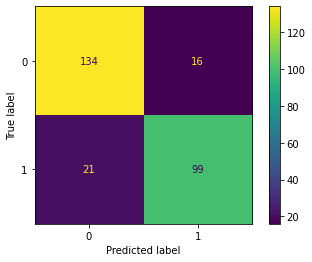

In [290]:
plot_confusion_matrix(NB, X_selected_features_NB, y)

In [291]:
selected = pd.DataFrame(X_selected_features_NB)
selected

0    1    2    3    4    5    6    7         8    9         10  \
0    0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.854167  1.0  0.339623   
1    0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.791667  0.0  0.198113   
2    0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.583333  1.0  0.283019   
3    0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.729167  1.0  0.320755   
4    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.937500  0.0  0.245283   
..   ...  ...  ...  ...  ...  ...  ...  ...       ...  ...       ...   
265  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.479167  1.0  0.735849   
266  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.312500  1.0  0.245283   
267  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.562500  0.0  0.433962   
268  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.583333  1.0  0.433962   
269  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.791667  1.0  0.622642   

           11   12   13        14   15        16        17  
0    0.447489  0.0  1.0  0.290076  0.0  0.387097  1.000000  
1    1.000000  0.0  1.0  0.679389  0.0  0.258065  0.000000  
2    0.308219  0.0  0.0  0.534351  0.0  0.048387  0.000000  
3    0.312785  0.0  0.0  0.259542  1.0  0.032258  0.333333  
4    0.326484  0.0  1.0  0.381679  1.0  0.032258  0.333333  
..        ...  ...  ...       ...  ...       ...       ...  
265  0.166667  1.0  0.0  0.694656  0.0  0.080645  0.000000  
266  0.312785  0.0  0.0  0.778626  0.0  0.000000  0.000000  
267  0.383562  0.0  1.0  0.625954  0.0  0.209677  0.000000  
268  0.150685  0.0  0.0  0.587786  0.0  0.064516  0.000000  
269  0.365297  0.0  1.0  0.282443  1.0  0.241935  1.000000  

[270 rows x 18 columns]

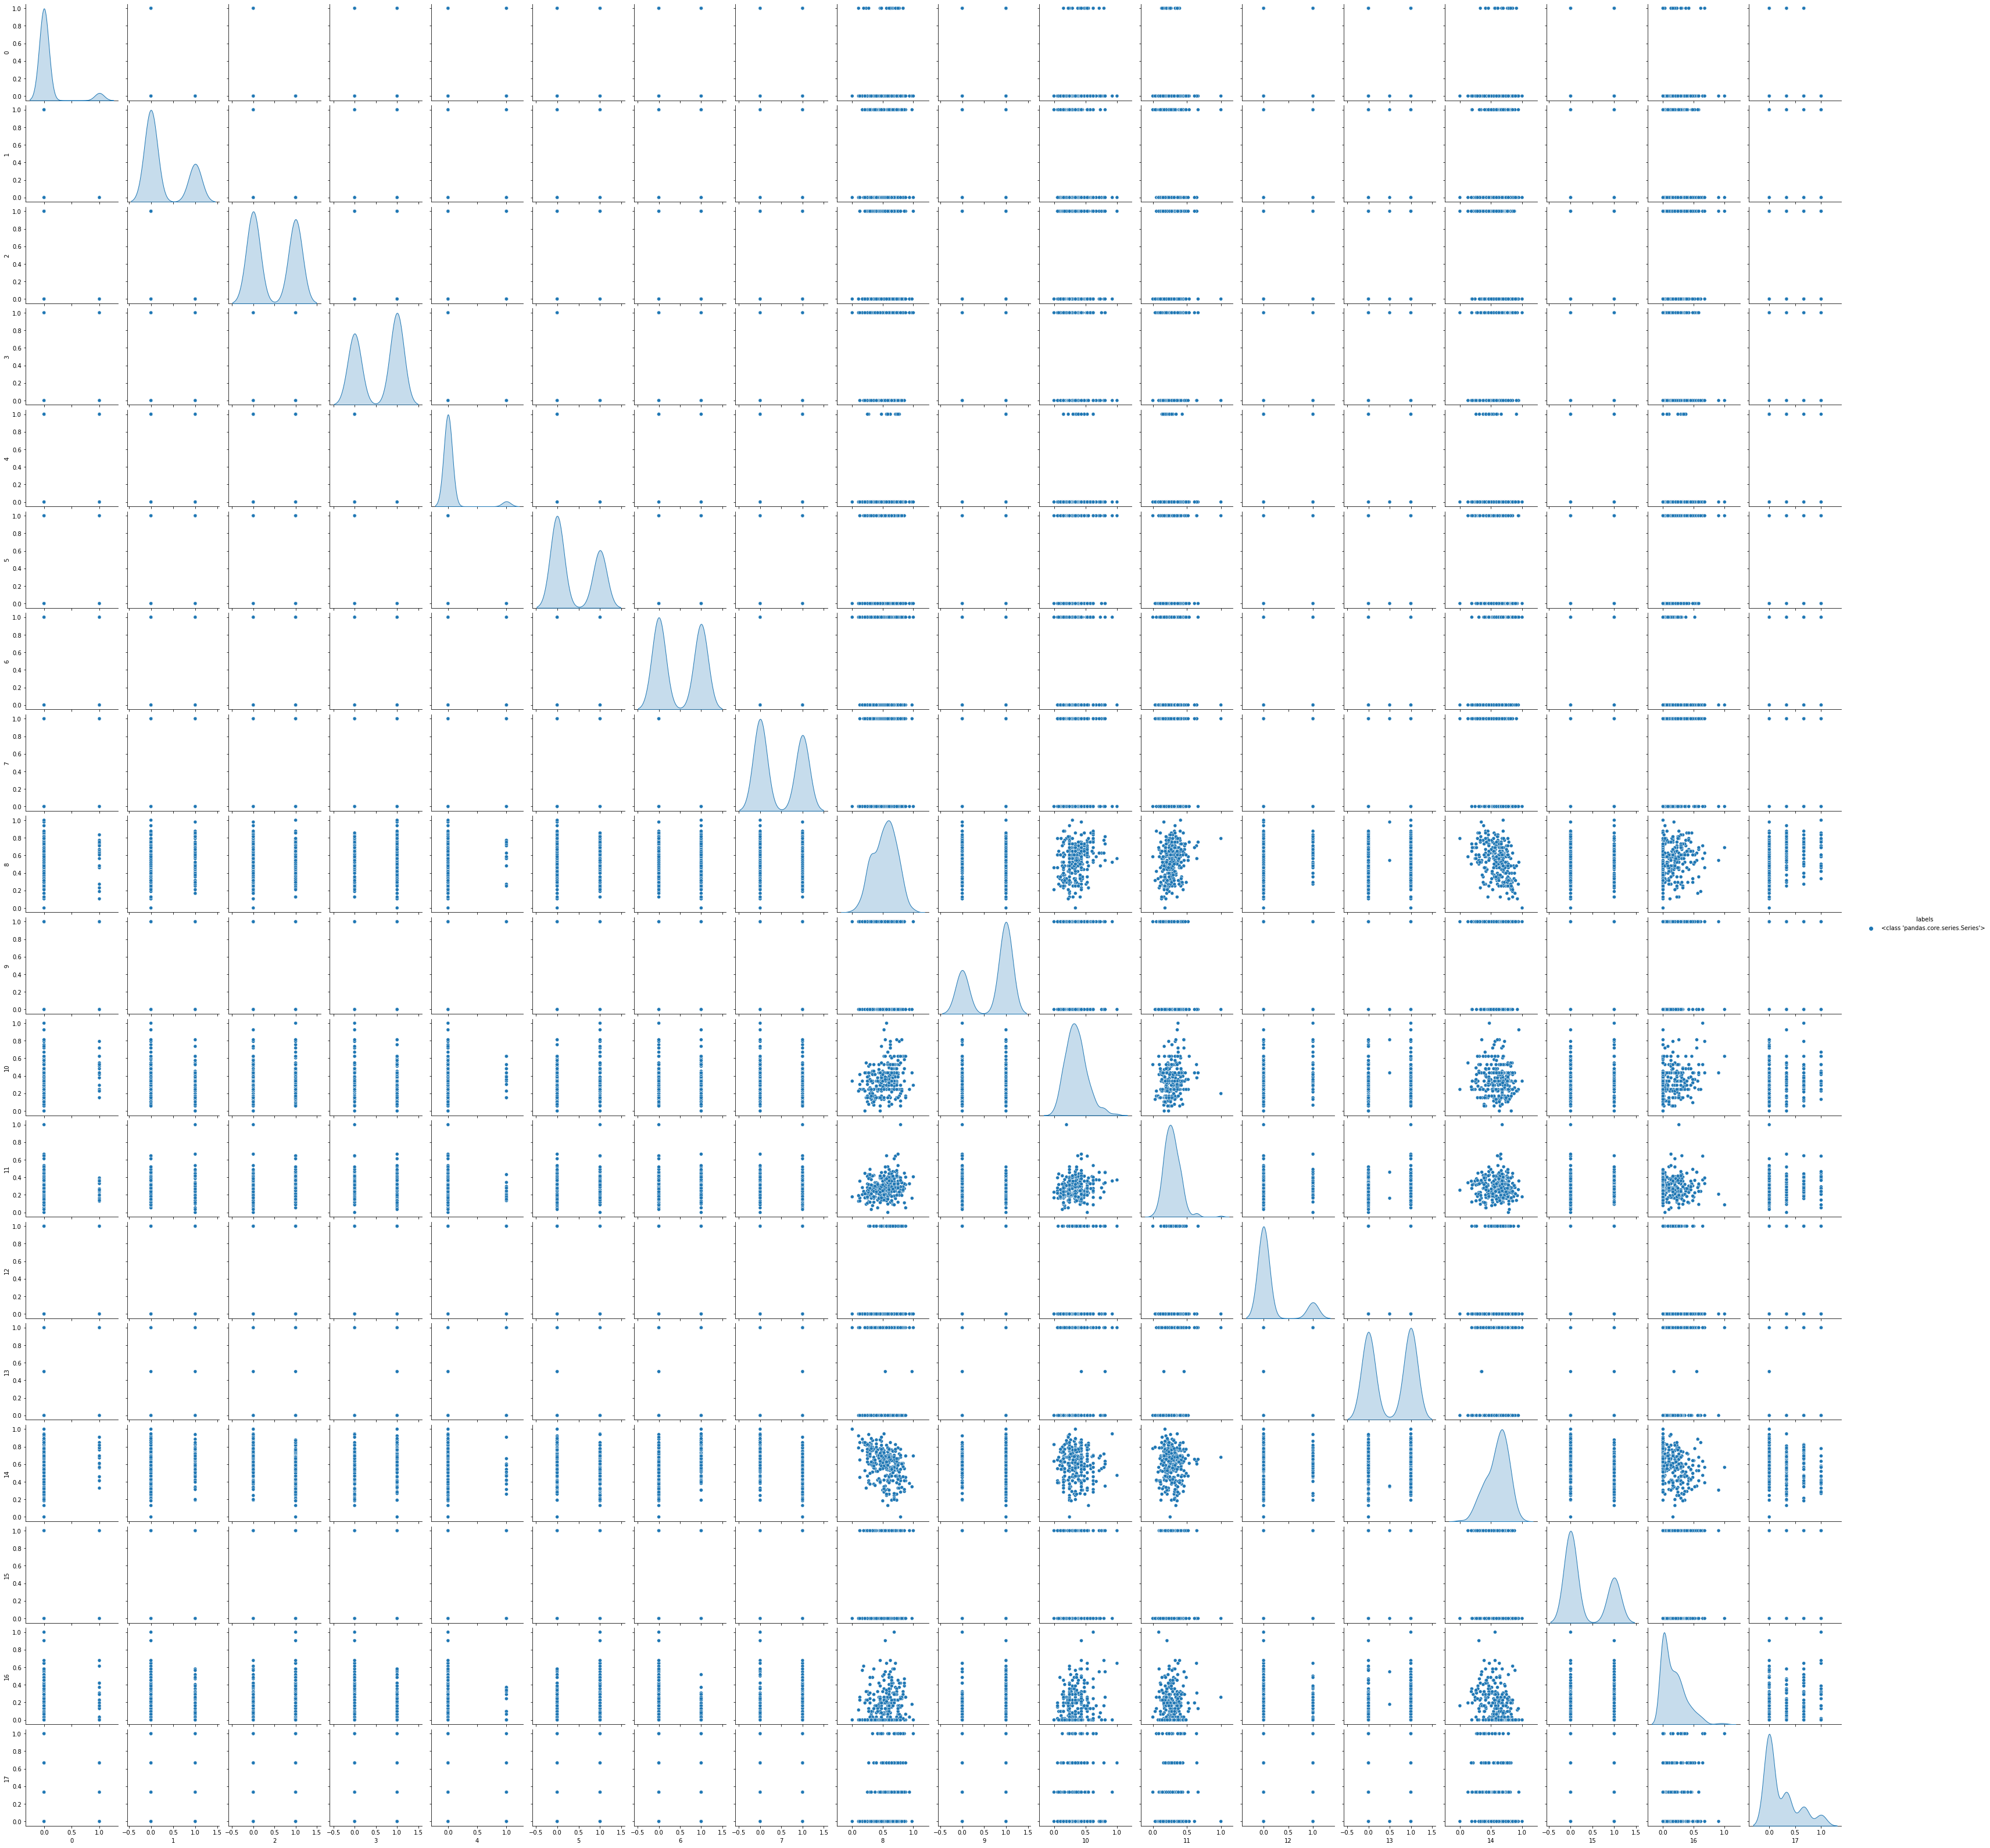

In [292]:
import seaborn as sns
selected['labels'] = pd.Series
sns.pairplot(selected, hue = 'labels')

PSO on Decision Tree

In [293]:
from sklearn.tree import DecisionTreeClassifier

In [294]:
dt_reg = DecisionTreeClassifier(max_depth=3 , criterion='gini',random_state=0)
dt_reg.fit(xtrain , ytrain)
ypred_train = dt_reg.predict(xtrain)
ypred_test = dt_reg.predict(xtest)

In [295]:
def f_per_particle(m, alpha):
    total_features = x.shape[1]

    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:, m ==1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.20, random_state=None)
    
    # Perform classification and store performance in P
    
    dt_reg.fit(X_train, y_train)
    P = (dt_reg.predict(X_test) == y_test).mean()
    
    kf = KFold(shuffle=True , n_splits = 5 , random_state=0)
    scores = cross_val_score(dt_reg, X_subset, y, cv=kf, scoring= "roc_auc")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    P = scores.mean()
    
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    

    print("Particle j: ", j)
    return j

In [296]:
def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [297]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
# Call instance of PSO
dimensions =  X.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=270, dimensions=dimensions,options=options)
# Perform optimization
cost, pos = optimizer.optimize(f, iters=100, verbose=2)


2021-09-21 14:34:35,688 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/100

Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18379157509157504
Accuracy: 0.79 (+/- 0.06)
Particle j:  0.24801572039072037
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.21116599511599507
Accuracy: 0.78 (+/- 0.08)
Particle j:  0.27397533577533567
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1808415750915751
Accuracy: 0.82 (+/- 0.12)
Particle j:  0.2155397435897436
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.1813076312576311
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.20999426129426124
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.24923305860805867
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.19577753357753352
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1861458485958486
Accuracy: 0.73 (+/- 0.10)
Particle j:  0.3076155982905983
Accuracy: 0.76 (+/- 0.05)
Particle j:  0.2748382783882784
Accuracy: 0.77 (+/- 0.07)
Particle j:  0.246891056166056
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.21551517094017097
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.20894667277167278
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19255439560439558
Accur

pyswarms.discrete.binary:   1%|          |1/100, best_cost=0.144


Particle j:  0.21340619658119658
Accuracy: 0.84 (+/- 0.03)
Particle j:  0.18666785714285716
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.20488452380952374
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.2174896214896215
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.19841642246642238
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.21905360195360202
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.21589703907203908
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.1762806776556778
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.22189703907203906
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2282704212454213
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2222704212454213
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2222704212454213
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2282704212454213
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.1882806776556778
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17028067765567775
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.21589703907203908
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.1882806776556778
Accuracy: 0.80 (+/- 0.10)
Part

pyswarms.discrete.binary:   2%|▏         |2/100, best_cost=0.144


Particle j:  0.2222704212454213
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.22189703907203906
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2222704212454213
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2282704212454213
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2282704212454213
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17028067765567775
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.22189703907203906
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.2339716422466422
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.2339716422466422
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2397424908424909
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.25559523809523815
Accuracy: 0.84 (+/- 0.03)
Particle j:  0.20413916361416362
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.2339716422466422
Accuracy: 0.80 (+/- 0.09)
Particle j:  0.23852857142857148
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.18446318681318674
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.25539801587301597
Accuracy: 0.80 (+/- 0.09)
Particle j:  0.24246669719169717
Accuracy: 0.79 (+/- 0.09)
Part

pyswarms.discrete.binary:   3%|▎         |3/100, best_cost=0.144

Accuracy: 0.80 (+/- 0.08)
Particle j:  0.23594169719169714
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.25559523809523815
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2499480158730159
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.25539801587301597
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.25539801587301597
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14455409035409045
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14455409035409045
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15055409035409045
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14455409035409045
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15107631257631274
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1555763125763126
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1555763125763126
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1555763125763126
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13855409035409044
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13855409035409044
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14455409035409045
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13855409035409044
A

pyswarms.discrete.binary:   4%|▍         |4/100, best_cost=0.134


Particle j:  0.13855409035409044
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15618070818070823
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14455409035409045
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19429105616605613
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18860952380952378
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19523452380952389
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.2006095238095238
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.18407026862026865
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17657026862026864
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.2012345238095239
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19523452380952389
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.18923452380952388
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18860952380952378
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19523452380952389
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.1960410561660561
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1946095238095238
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18860952380952378
Accuracy: 0.83 (+/- 0.06)


pyswarms.discrete.binary:   5%|▌         |5/100, best_cost=0.134


Particle j:  0.18969526862026867
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.20723452380952387
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18860952380952378
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19780119047619055
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15320409035409038
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15653415750915753
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17617448107448097
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.14991520146520146
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17582759462759445
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.1656248168498168
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17125366300366307
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.1770376984126984
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15653415750915753
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15653415750915753
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1590341575091574
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15653415750915753
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1590341575091574
Accuracy: 0.86 (+/- 0.07)


pyswarms.discrete.binary:   6%|▌         |6/100, best_cost=0.134


Particle j:  0.1656248168498168
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17033592796092784
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16253415750915753
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.17041724664224656
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15653415750915753
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.22773055555555557
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.2475661477411477
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.22209722222222222
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.2702354395604395
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.2702354395604395
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.2702354395604395
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.22209722222222222
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.26463336385836383
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.2545581196581196
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.26463336385836383
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.26463336385836383
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.26463336385836383
Accuracy: 0.79 (+/- 0.07)
Pa

pyswarms.discrete.binary:   7%|▋         |7/100, best_cost=0.134


Particle j:  0.26463336385836383
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18100583028083028
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18700583028083026
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18100583028083028
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18100583028083028
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16212426739926739
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16967982295482298
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16967982295482298
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16967982295482298
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.17503916361416355
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18100583028083028
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18100583028083028
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.17503916361416355
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.17567982295482298
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16967982295482298
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18100583028083028
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16967982295482298
Accuracy: 0.85 (+/- 0.

pyswarms.discrete.binary:   8%|▊         |8/100, best_cost=0.134


Particle j:  0.18100583028083028
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.17567982295482298
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18100583028083028
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.20489945054945052
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.20254725274725274
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.20254725274725274
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.20254725274725274
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.20854725274725275
Accuracy: 0.80 (+/- 0.09)
Particle j:  0.24076602564102578
Accuracy: 0.78 (+/- 0.08)
Particle j:  0.2602959401709402
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.20854725274725275
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.20254725274725274
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.21454725274725275
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.20254725274725274
Accuracy: 0.85 (+/- 0.06)
Particle j:  0.19311495726495723
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16109853479853492
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.20254725274725274
Accuracy: 0.83 (+/- 0.0

pyswarms.discrete.binary:   9%|▉         |9/100, best_cost=0.134


Particle j:  0.2125805860805861
Accuracy: 0.88 (+/- 0.08)
Particle j:  0.15459853479853486
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.2082840659340659
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1675874236874237
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16109853479853492
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18127909035409023
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18127909035409023
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.2088607448107448
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1973496336996336
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.20973354700854702
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.20973354700854702
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.19395079365079362
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.20973354700854702
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1973496336996336
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1871396825396826
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.20334963369963358
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.21745882173382172
Accuracy: 0.86 (+/- 0.06)
Par

pyswarms.discrete.binary:  10%|█         |10/100, best_cost=0.134


Particle j:  0.19643412698412704
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.203733547008547
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18727909035409024
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.203733547008547
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.2088607448107448
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.20959407814407824
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1505429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1505429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1490763125763126
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15029853479853472
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15029853479853472
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1490763125763126
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1505429792429792
Accuracy: 0.87 (+/- 0.10)
Partic

pyswarms.discrete.binary:  11%|█         |11/100, best_cost=0.134


Particle j:  0.1505429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15606520146520148
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1653854090354089
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1653854090354089
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1653854090354089
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1653854090354089
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1653854090354089
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18118540903540908
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1653854090354089
Accuracy: 0.85 (+/- 0.11)
Par

pyswarms.discrete.binary:  12%|█▏        |12/100, best_cost=0.139

Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1653854090354089
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15370409035409036
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.21536230158730157
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2262690170940172
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2262690170940172
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2262690170940172
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2317855006105007
Accuracy: 0.81 (+/- 0.11)
Particle j:  0.24121846764346777
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2317855006105007
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2262690170940172
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2262690170940172
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2262690170940172
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.22686901709401705
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2262690170940172
Accurac

pyswarms.discrete.binary:  13%|█▎        |13/100, best_cost=0.134


Particle j:  0.2262690170940172
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.23031883394383393
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.2317855006105007
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16660070207570207
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13132075702075707
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14430964590964596
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13782075702075702
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13732075702075708
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14430964590964596
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16660070207570207
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14382075702075703
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13132075702075707
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13132075702075707
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16060070207570207
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13132075702075707
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17918977411477405
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13132075702075707
Accuracy: 0.87 (+/- 0.10

pyswarms.discrete.binary:  14%|█▍        |14/100, best_cost=0.131


Particle j:  0.16060070207570207
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.16060070207570207
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15829853479853473
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.17029853479853474
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15829853479853473
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17260763125763123
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.17396318681318684
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.17029853479853474
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16820964590964588
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.18705207570207566
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15829853479853473
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16429853479853473
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15229853479853475
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16429853479853473
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.18705207570207566
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.18901874236874228
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.17420964590964588
Accuracy: 0.85 (+/- 0.

pyswarms.discrete.binary:  15%|█▌        |15/100, best_cost=0.131


Particle j:  0.16820964590964588
Accuracy: 0.81 (+/- 0.11)
Particle j:  0.20824117826617827
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.19411617826617825
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.19411617826617825
Accuracy: 0.81 (+/- 0.11)
Particle j:  0.20824117826617827
Accuracy: 0.81 (+/- 0.11)
Particle j:  0.20224117826617827
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.20011617826617825
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.20518562271062268
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.2030606227106226
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.1991856227106227
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.20011617826617825
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.19411617826617825
Accuracy: 0.81 (+/- 0.11)
Particle j:  0.19624117826617826
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.20518562271062268
Accuracy: 0.81 (+/- 0.11)
Particle j:  0.19024117826617826
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.2030606227106226
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.1991856227106227
Accuracy: 0.81 (+/- 0.11)


pyswarms.discrete.binary:  16%|█▌        |16/100, best_cost=0.131


Particle j:  0.2030606227106226
Accuracy: 0.81 (+/- 0.11)
Particle j:  0.19024117826617826
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.16304297924297922
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14430964590964596
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1565429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14980964590964596
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14980964590964596
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1505429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1565429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1505429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14430964590964596
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14430964590964596
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1565429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14430964590964596
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1809393772893773
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.16728443223443218
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16769239926739926
Accuracy: 0.87 (+/- 0.10)
Par

pyswarms.discrete.binary:  17%|█▋        |17/100, best_cost=0.131


Particle j:  0.14430964590964596
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15704297924297922
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1505429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1505429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15704297924297922
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.19890998168498175
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.2138720085470085
Accuracy: 0.83 (+/- 0.04)
Particle j:  0.19890998168498175
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.82 (+/- 0.06)

pyswarms.discrete.binary:  18%|█▊        |18/100, best_cost=0.131


Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.22444645909645902
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21989700854700844
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.22444645909645902
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.21251886446886437
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2271327533577533
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20584108669108675
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20584108669108675
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2331327533577533
Accuracy: 0.80 (+/- 0.10)
Particle j:  0.2298004884004884
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20584108669108675
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20584108669108675
Accuracy: 0.80 (+/- 0.09)
Particle j:  0.22145280830280833
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.21251886446886437
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.21000946275946275
Accuracy: 0.82 (+/- 0.10)

pyswarms.discrete.binary:  19%|█▉        |19/100, best_cost=0.131


Particle j:  0.21251886446886437
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.21251886446886437
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.20584108669108675
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.2011632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1891632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1891632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1951632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1891632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.2011632783882783
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.1899275335775334
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.2011632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1951632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1951632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1951632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1891632783882783
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.19224975579975562
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18917716727716724
Accuracy: 0.83 (+/- 0.05)
Particle

pyswarms.discrete.binary:  20%|██        |20/100, best_cost=0.131


Particle j:  0.2011632783882783
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1951632783882783
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.20291327838827847
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14382075702075703
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14715409035409024
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17122548840048846
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18860952380952378
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14605409035409028
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1572699328449329
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.18860952380952378
Accuracy: 0.87 (+/- 0.09)

pyswarms.discrete.binary:  21%|██        |21/100, best_cost=0.131


Particle j:  0.1946095238095238
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1622398046398045
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15575091575091585
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.16358424908424907
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15575091575091585
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.16175091575091585
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.16358424908424907
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17940268620268612
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15575091575091585
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15575091575091585
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15575091575091585
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1622398046398045
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15575091575091585
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1622398046398045
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15575091575091585
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.16908424908424904
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.16946202686202674
Accuracy: 0.85 (+/- 0.12)


pyswarms.discrete.binary:  22%|██▏       |22/100, best_cost=0.131


Particle j:  0.1622398046398045
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14910943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15498443223443215
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1907937118437118
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14910943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1469094322344322
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14910943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15510943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15510943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14910943223443224
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.1847937118437118
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14910943223443224
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15557609890109889
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15510943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14910943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15510943223443224
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.16377609890109884
Accuracy: 0.87 (+/- 0.09)


pyswarms.discrete.binary:  23%|██▎       |23/100, best_cost=0.131


Particle j:  0.15557609890109889
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15557609890109889
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14910943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15510943223443224
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14910943223443224
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1872892246642247
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1812892246642247
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1872892246642247
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1872892246642247
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1872892246642247
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1812892246642247
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.19377811355311347
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1872892246642247
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1812892246642247
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1711336691086691
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.19377811355311347
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1812892246642247
Accuracy: 0.83 (+/- 0.13)
Partic

pyswarms.discrete.binary:  24%|██▍       |24/100, best_cost=0.131


Particle j:  0.17762255799755786
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18777811355311347
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17762255799755786
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.19377811355311347
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15655409035409046
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15055409035409045
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15655409035409046
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.16255409035409046
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15655409035409046
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16158742368742368
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16624969474969464
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15509853479853491
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14982075702075703
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15655409035409046
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15655409035409046
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15655409035409046
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16158742368742368
Accuracy: 0.87 (+/- 0.

pyswarms.discrete.binary:  25%|██▌       |25/100, best_cost=0.131


Particle j:  0.15558742368742368
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15055409035409045
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15558742368742368
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16158742368742368
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1512699328449329
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16522548840048848
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16522548840048848
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.1537119352869353
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1572699328449329
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16342582417582419
Accuracy: 0.85 (+/- 0.09)

pyswarms.discrete.binary:  26%|██▌       |26/100, best_cost=0.131

Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16522548840048848
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15922548840048847
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1873008241758241
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16699020146520155
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17299020146520155
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16699020146520155
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16699020146520155
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1813008241758241
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1813008241758241
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1873008241758241
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1813008241758241
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17396797924297924
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1813008241758241
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1813008241758241
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1813008241758241
Accur

pyswarms.discrete.binary:  27%|██▋       |27/100, best_cost=0.131


Particle j:  0.16699020146520155
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17396797924297924
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1813008241758241
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1873008241758241
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1813008241758241
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1699346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1639346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17593464590964591
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1699346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1639346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1699346459096459
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1737398656898657
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16439020146520136
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1639346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1639346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1699346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1639346459096459
Accuracy: 0.86 (+/- 0.11)
Particle 

pyswarms.discrete.binary:  28%|██▊       |28/100, best_cost=0.131


Particle j:  0.1639346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1639346459096459
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1699346459096459
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1602782661782661
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16184795482295466
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1602782661782661
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1602782661782661
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16184795482295466
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.17482573260073253
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15933137973137965
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1602782661782661
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16784795482295467
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16184795482295466
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1602782661782661
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16784795482295467
Accuracy: 0.88 (+/- 0.05)
Particle j:  0.14988937728937723
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16784795482295467
Accuracy: 0.87 (+/- 0.07)
Part

pyswarms.discrete.binary:  28%|██▊       |28/100, best_cost=0.131


Particle j:  0.16784795482295467
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1602782661782661
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.17482573260073253
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1602782661782661
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16637029914529908
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1602782661782661
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16823382173382187
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16743998778998764


pyswarms.discrete.binary:  29%|██▉       |29/100, best_cost=0.131

Accuracy: 0.81 (+/- 0.08)
Particle j:  0.22989801587301592
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20214258241758226
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.22989801587301592
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.21444813797313797
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21663702686202696
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.22044813797313798
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.23309813797313791
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20814258241758227
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.22389801587301592
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.20490769230769224
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.22944258241758242
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.21212783882783875
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.20926981074481074
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.22263702686202697
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.21444813797313797
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.22944258241758242
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.220448137973137

pyswarms.discrete.binary:  30%|███       |30/100, best_cost=0.131

Accuracy: 0.81 (+/- 0.04)
Particle j:  0.21663702686202696
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.20490769230769224
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.22389801587301592
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.24035912698412695
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.2263660256410256
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.23909813797313792
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.2136536935286935
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.19315589133089128
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.19315589133089128
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.19315589133089128
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.19315589133089128
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.19315589133089128
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.19315589133089128
Accuracy: 0.85 (+/- 0.13)
Particle j:  0.16522313797313787
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.19315589133089128
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
A

pyswarms.discrete.binary:  31%|███       |31/100, best_cost=0.131


Particle j:  0.19964478021978027
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16109853479853492
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1604941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16109853479853492
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.16109853479853492
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1604941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15509853479853491
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1675874236874237
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1664941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1604941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15509853479853491
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1604941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1604941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15509853479853491
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15509853479853491
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1664941391941391
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1690652014652015
Accuracy: 0.88 (+/- 0.09)
Parti

pyswarms.discrete.binary:  32%|███▏      |32/100, best_cost=0.131


Particle j:  0.16158742368742368
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1604941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15509853479853491
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1604941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.1664941391941391
Accuracy: 0.88 (+/- 0.09)
Particle j:  0.15509853479853491
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16242582417582413
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15210082417582413
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16622582417582427
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16622582417582427
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1603008241758242
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15210082417582413
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1603008241758242
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1603008241758242
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16622582417582427
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1603008241758242
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1603008241758242
Accuracy: 0.85 (+/- 0.09)
Part

pyswarms.discrete.binary:  33%|███▎      |33/100, best_cost=0.131

Particle j:  0.1603008241758242
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1576568681318681
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.1576568681318681
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1754257326007326
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.14715686813186812
Accuracy: 0.86 (+/- 0.09)
P

pyswarms.discrete.binary:  34%|███▍      |34/100, best_cost=0.131

Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15179853479853483
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1644096459096459
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15890964590964596
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16504526862026855
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16220964590964587
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1683207570207569

pyswarms.discrete.binary:  35%|███▌      |35/100, best_cost=0.131

Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16832075702075697
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15890964590964596
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.25680082417582406
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.25080082417582406
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2613341575091575
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2613341575091575
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2613341575091575
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2613341575091575
Accuracy: 0.77 (+/- 0.08)
Particle j:  0.2617299450549452
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2613341575091575
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.25680082417582406
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2553341575091575
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2613341575091575
Accur

pyswarms.discrete.binary:  36%|███▌      |36/100, best_cost=0.131


Particle j:  0.2553341575091575
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2613341575091575
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2553341575091575
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.25680082417582406
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.25680082417582406
Accuracy: 0.84 (+/- 0.07)
Particle j:  0.16892304639804642
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.1764132783882784
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18242716727716732
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18242716727716732
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.1764132783882784
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1755192002442002
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.17846526251526248
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.17767304639804649
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.1764271672771673
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.1764132783882784
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.1824132783882784
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.16567304639804648
Accuracy: 0.83 (+/- 0.06)
Parti

pyswarms.discrete.binary:  37%|███▋      |37/100, best_cost=0.131

Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18842716727716732
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17881105006105008
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.19016327838827846
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.19077811355311358
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.19077811355311358
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.19077811355311358
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1674620268620268
Accuracy: 0.84 (+/- 0.13)
Particle j:  0.18553693528693527
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.19077811355311358
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.19077811355311358
Accur

pyswarms.discrete.binary:  38%|███▊      |38/100, best_cost=0.131


Particle j:  0.1727398046398046
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.20052811355311356
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1727398046398046
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17872869352869353
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1787398046398046
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13454297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13454297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13477631257631273
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12254297924297924
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14629853479853475
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13454297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12254297924297924
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
P

pyswarms.discrete.binary:  39%|███▉      |39/100, best_cost=0.123


Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12254297924297924
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13477631257631273
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14127631257631257
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13477631257631273
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14171520146520142
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14532075702075703
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14171520146520142
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14171520146520142
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.143070757020757
Accuracy: 0.87 (+/- 0.09

pyswarms.discrete.binary:  40%|████      |40/100, best_cost=0.123


Particle j:  0.14532075702075703
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14532075702075703
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16864536019536025
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16864536019536025
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.19315589133089128
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20865528083028084
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16264536019536024
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1811558913308913
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20865528083028084
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16864536019536025
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.83 (+/- 0.11)
Part

pyswarms.discrete.binary:  41%|████      |41/100, best_cost=0.123


Particle j:  0.16864536019536025
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16864536019536025
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17513424908424902
Accuracy: 0.83 (+/- 0.11)
Particle j:  0.1871558913308913
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20181526251526255
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19581526251526254
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19581526251526254
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20181526251526255
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20181526251526255
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19631526251526257
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19631526251526257
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20181526251526255
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19031526251526257
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19031526251526257
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.20181526251526255
Accuracy: 0.82 (+/- 0.06)

pyswarms.discrete.binary:  42%|████▏     |42/100, best_cost=0.123


Particle j:  0.19631526251526257
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19631526251526257
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19631526251526257
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15943165445665444
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15229853479853475
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15829853479853473
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14629853479853475
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15343165445665444
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15890964590964596
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15890964590964596
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15890964590964596
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.16106196581196588
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15229853479853475
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.16106196581196588
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15229853479853475
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.16706196581196586
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15229853479853475
Accuracy: 0.87 (+/- 0.

pyswarms.discrete.binary:  43%|████▎     |43/100, best_cost=0.123


Particle j:  0.16106196581196588
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15229853479853475
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14629853479853475
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15229853479853475
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14629853479853475
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14654297924297924
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.1517202686202687
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.1577202686202687
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.1517202686202687
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15277631257631274
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.86 (+/- 0.08)

pyswarms.discrete.binary:  44%|████▍     |44/100, best_cost=0.123


Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14127631257631257
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.1577202686202687
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14127631257631257
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20719563492063492
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.20932063492063496
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20719563492063492
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.20932063492063496
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.20932063492063496
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.22082063492063492
Accuracy: 0.84 (+/- 0.02)
Particle j:  0.18954285714285718
Accuracy: 0.81 (+/- 0.11)
Particle j:  0.21269563492063498
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20746230158730156
Accuracy: 0.80 (+/- 0.12)
Particle j:  0.2143206349206349
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17967896825396823
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20746230158730156
Accuracy: 0.80 (+/- 0.12

pyswarms.discrete.binary:  45%|████▌     |45/100, best_cost=0.123

0.1908123015873016
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.20932063492063496
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17846736874236868
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17246736874236868
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17846736874236868
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17246736874236868
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14143742368742362
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.14279297924297923
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.14279297924297923
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14743742368742363
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14143742368742362
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.14279297924297923
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.14279297924297923
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.14279297924297923
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.14279297924297923
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.16646736874236867
Accuracy: 0.87 (+/- 0.11)
Particle j:  0.14279297924297923
Accuracy: 0.86 (+/- 0.11)
Particle j:

pyswarms.discrete.binary:  46%|████▌     |46/100, best_cost=0.123


Particle j:  0.14279297924297923
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.23158592796092783
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21885259462759457
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22558592796092783
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.23158592796092783
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21885259462759457
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.21308046398046399
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22558592796092783
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22558592796092783
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21885259462759457
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22558592796092783
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22558592796092783
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21885259462759457
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21885259462759457
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22558592796092783
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22558592796092783
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.2308753357753358
Accuracy: 0.81 (+/- 0.1

pyswarms.discrete.binary:  47%|████▋     |47/100, best_cost=0.123

Accuracy: 0.81 (+/- 0.10)
Particle j:  0.21885259462759457
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.22558592796092783
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14923186813186815
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14923186813186815
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15473186813186823
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15694297924297934
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.18233840048840044
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.19201617826617823
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.15473186813186823
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.19433840048840045
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.18233840048840044
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.18833840048840045
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15694297924297934
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14323186813186814
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.19201617826617823
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14923186813186815
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.149231868131868

pyswarms.discrete.binary:  48%|████▊     |48/100, best_cost=0.123


Particle j:  0.18833840048840045
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.1936050671550672
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.1899272893772894
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.1936050671550672
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1812892246642247
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1812892246642247
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1812892246642247
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16892582417582416
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.18092582417582417
Accuracy: 0.84 (+/- 0.13)
Particle j:  0.18559615384615374
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15697313797313794
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.18427103174603174
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.1815369352869353
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17492582417582417
Accuracy: 0.84 (+/- 0.13)
Particle j:  0.18559615384615374
Accuracy: 0.85 (+/- 0.11)
Par

pyswarms.discrete.binary:  49%|████▉     |49/100, best_cost=0.123


Particle j:  0.17492582417582417
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15547313797313786
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15547313797313786
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15547313797313786
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15697313797313794
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.1812892246642247
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1685818681318681
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1685818681318681
Accuracy: 0.84 (+/- 0.09)

pyswarms.discrete.binary:  50%|█████     |50/100, best_cost=0.123

Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18049652014652012
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17449652014652012
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1280429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13477631257631273
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13465409035409043
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1280429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1280429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13477631257631273
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1280429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1280429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy

pyswarms.discrete.binary:  51%|█████     |51/100, best_cost=0.123


Particle j:  0.13477631257631273
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16246318681318678
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16246318681318678
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16246318681318678
Accuracy: 0.85 (+/- 0.

pyswarms.discrete.binary:  52%|█████▏    |52/100, best_cost=0.123

Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.15646318681318677
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1543137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1543137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1543137973137973
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1543137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1590915750915751
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1543137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1543137973137973
Accu

pyswarms.discrete.binary:  53%|█████▎    |53/100, best_cost=0.123

Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1543137973137973
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15697313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15097313797313794
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.2067720085470086
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.21589423076923064
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.21589423076923064
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21875137362637362
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21275137362637364
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.21589423076923064
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.17203601953601952
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.2096291514041514
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21275137362637364
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21875137362637362
Accuracy: 0.81 (+/- 0.05)
Particle j:  0.21589423076923064
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21275137362637364
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21875137362637362
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15045409035409035


pyswarms.discrete.binary:  54%|█████▍    |54/100, best_cost=0.123


Particle j:  0.2036291514041514
Accuracy: 0.82 (+/- 0.09)
Particle j:  0.2096291514041514
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16454297924297923
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15595409035409036
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16454297924297923
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.17016520146520145
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15595409035409036
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15595409035409036
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15804297924297928
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1520429792429793
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15045409035409035
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15854297924297922
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15927631257631258
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15877631257631275
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15254297924297924
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1520429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14654297924297924
Accuracy: 0.86 (+/- 0.10)


pyswarms.discrete.binary:  55%|█████▌    |55/100, best_cost=0.123


Particle j:  0.14654297924297924
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16245409035409036
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.16366520146520142
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.18216520146520143
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15327631257631258
Accuracy: 0.85 (+/- 0.13)
Particle j:  0.16448980463980462
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17248424908424903
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17248424908424903
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16725097680097695
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.15720131257631265
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17248424908424903
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17248424908424903
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16725097680097695
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.17325097680097695
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.17325097680097695
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1753786935286935
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17248424908424903
Accuracy: 0.86 (+/- 0.0

pyswarms.discrete.binary:  56%|█████▌    |56/100, best_cost=0.123


Particle j:  0.16448980463980462
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1693786935286935
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1662398046398046
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17763986568986578
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.2068031746031746
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21330317460317466
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21330317460317466
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.81 (+/- 0.06)

pyswarms.discrete.binary:  57%|█████▋    |57/100, best_cost=0.123

Particle j:  0.21330317460317466
Accuracy: 0.81 (+/- 0.06)
Particle j:  0.21930317460317467
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15317026862026864
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16342582417582419
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15917026862026862
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15317026862026864
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15317026862026864
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.16893937728937733
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15317026862026864
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15917026862026862
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15375915750915753
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15714554334554331
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15317026862026864
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.14717026862026863
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16342582417582419
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1511455433455433
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.14717026862026863
Accuracy: 0.85 (+/- 0.09

pyswarms.discrete.binary:  58%|█████▊    |58/100, best_cost=0.123

Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15917026862026862
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15714554334554331
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.1577015873015873
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.14861874236874217
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.14861874236874217
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.14798769841269838
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.14798769841269838
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.14798769841269838
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.14798769841269838
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1538265873015872
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14882380952380952
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.14861874236874217
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14882380952380952
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14882380952380952
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1499742979242978
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14882380952380952
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16452985347985333


pyswarms.discrete.binary:  59%|█████▉    |59/100, best_cost=0.123


Particle j:  0.14882380952380952
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14882380952380952
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14882380952380952
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15398769841269838
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14882380952380952
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.14882380952380952
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.19573452380952383
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.19573452380952383
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.20496785714285704
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20173452380952384
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.19573452380952383
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.19573452380952383
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.19573452380952383
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.19573452380952383
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.18973452380952383
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.19573452380952383
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20173452380952384
Accuracy: 0.82 (+/- 0.

pyswarms.discrete.binary:  60%|██████    |60/100, best_cost=0.123


Particle j:  0.19573452380952383
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20173452380952384
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20173452380952384
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20173452380952384
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1547231379731378
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1547231379731378
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.16569105616605614
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1729021672771672
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.15336758241758236
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.17568360805860792
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.16072313797313778
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1547231379731378
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.15336758241758236
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.16569105616605614
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1729021672771672
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.1547231379731378
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1729021672771672
Accuracy: 0.84 (+/- 0.12)
Par

pyswarms.discrete.binary:  61%|██████    |61/100, best_cost=0.123


Particle j:  0.15936758241758237
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1864028083028083
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.20481746031746034
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.18503614163614168
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.19881746031746034
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.1865361416361417
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1864028083028083
Accuracy: 0.81 (+/- 0.07)
Particle j:  0.20606746031746026
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.1985361416361417
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.1865361416361417
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1804028083028083
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.1790361416361417
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1804028083028083
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.19384108669108663
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1804028083028083
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.19384108669108663
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1864028083028083
Accuracy: 0.83 (+/- 0.09)
Partic

pyswarms.discrete.binary:  62%|██████▏   |62/100, best_cost=0.123


Particle j:  0.19881746031746034
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.1864028083028083
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17952503052503047
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.23116883394383397
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.23116883394383397
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.23116883394383397
Accuracy: 0.77 (+/- 0.07)
Particle j:  0.243043833943834
Accuracy: 0.77 (+/- 0.06)
Particle j:  0.23778272283272278
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.23116883394383397
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.23116883394383397
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.23116883394383397
Accuracy: 0.81 (+/- 0.14)
Particle j:  0.20517451159951156
Accuracy: 0.79 (+/- 0.10)
Particle j:  0.22240772283272264
Accuracy: 0.77 (+/- 0.07)
Particle j:  0.243043833943834
Accuracy: 0.79 (+/- 0.09)
Particle j:  0.23116883394383397
Accuracy: 0.77 (+/- 0.07)
Particle j:  0.243043833943834
Accuracy: 0.79 (+/- 0.10)
Particle j:  0.22240772283272264
Accuracy: 0.77 (+/- 0.07)
Par

pyswarms.discrete.binary:  63%|██████▎   |63/100, best_cost=0.123

Accuracy: 0.79 (+/- 0.09)
Particle j:  0.23116883394383397
Accuracy: 0.77 (+/- 0.07)
Particle j:  0.243043833943834
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15047313797313794
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.16459105616605607
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15047313797313794
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.17659105616605608
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15047313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15047313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15697313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15047313797313794
Accuracy: 0.84 (+/- 0.11)
Particle j:  0.16459105616605607
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15047313797313794
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.16346202686202674
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.16053067765567774
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.16590647130647126
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.15990647130647126
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15697313797313794

pyswarms.discrete.binary:  64%|██████▍   |64/100, best_cost=0.123


Particle j:  0.15746202686202673
Accuracy: 0.84 (+/- 0.13)
Particle j:  0.1733731379731379
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1879546703296703
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1879546703296703
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1879546703296703
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.19064355921855913
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.18489355921855918
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.1945190170940172
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1939546703296703
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1879546703296703
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.18489355921855918
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1879546703296703
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.19064355921855913
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1879546703296703
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.19064355921855913
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1879546703296703
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.19064355921855913
Accuracy: 0.83 (+/- 0.05)
Partic

pyswarms.discrete.binary:  65%|██████▌   |65/100, best_cost=0.123


Particle j:  0.1879546703296703
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.19064355921855913
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1879546703296703
Accuracy: 0.82 (+/- 0.05)
Particle j:  0.19064355921855913
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14445409035409035
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14445409035409035
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14445409035409035
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14616520146520146
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13795409035409034
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13795409035409034
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13795409035409034
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14445409035409035
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14445409035409035
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13795409035409034
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14616520146520146
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14445409035409035
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13795409035409034
Accuracy: 0.86 (+/- 0.10

pyswarms.discrete.binary:  66%|██████▌   |66/100, best_cost=0.123


Particle j:  0.13795409035409034
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.14616520146520146
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.15216520146520146
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13477631257631273
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.20749673382173375
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.2057967338217337
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21949673382173374
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.21349673382173373
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.20962173382173382
Accuracy: 0.81 (+/- 0.1

pyswarms.discrete.binary:  67%|██████▋   |67/100, best_cost=0.123


Particle j:  0.21349673382173373
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1900902014652014
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1900902014652014
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.10)
Particle j:  0.1900902014652014
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19927909035409025
Accuracy: 0.84 (+/- 0.09)

pyswarms.discrete.binary:  68%|██████▊   |68/100, best_cost=0.123


Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.19327909035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16515409035409023
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15915409035409023
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16515409035409023
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16538742368742365
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.87 (+/- 0.

pyswarms.discrete.binary:  69%|██████▉   |69/100, best_cost=0.123

0.15915409035409023
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16538742368742365
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.17188742368742368
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.16538742368742365
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1823483211233211
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1823483211233211
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1823483211233211
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.19040326617826608
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.14717026862026863
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15635827228327234
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1823483211233211
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17562304639804638
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1511455433455433
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.1823483211233211
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17562304639804638
Accuracy: 0.84 (+/- 0.06)
Particle j:  0.17562304639804638
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.17514920634920633
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1

pyswarms.discrete.binary:  70%|███████   |70/100, best_cost=0.123


Particle j:  0.17562304639804638
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.14717026862026863
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.20535924908424907
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.19947036019536016
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19935924908424907
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19935924908424907
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.18806202686202683
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.17693702686202678
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.20698424908424917
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19231202686202686
Accuracy: 0.80 (+/- 0.09)
Particle j:  0.1916953601953602
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.19947036019536016
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.19507036019536025
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19935924908424907
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.18771202686202684
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.19947036019536016
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.19507036019536025
Accuracy: 0.83 (+/- 0.0

pyswarms.discrete.binary:  71%|███████   |71/100, best_cost=0.123

Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19406202686202684
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19935924908424907
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.17693702686202678
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19406202686202684
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.18631202686202686
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19935924908424907
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19231202686202686
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.19507036019536025
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17122548840048846
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17122548840048846
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17122548840048846
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1692699328449329
Accuracy: 0.87 (+/- 0.08)
Particle j:  0.15873141025641027
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17122548840048846
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16096993284493283
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16096993284493283
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.1689869658119657

pyswarms.discrete.binary:  72%|███████▏  |72/100, best_cost=0.123


Particle j:  0.17122548840048846
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16096993284493283
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1632699328449329
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.16096993284493283
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1632699328449329
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1829425213675213
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.1689869658119657
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17833959096459095
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17833959096459095
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17833959096459095
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17233959096459095
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17233959096459095
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.18885528083028086
Accuracy: 0.85 (+/- 0.07)
Particle j:  0.18239169719169712
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17833959096459095
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17233959096459095
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17833959096459095
Accuracy: 0.85 (+/- 0.10)


pyswarms.discrete.binary:  73%|███████▎  |73/100, best_cost=0.123


Particle j:  0.18433959096459096
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17833959096459095
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17833959096459095
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.18506062271062262
Accuracy: 0.80 (+/- 0.13)
Particle j:  0.1972939560439561
Accuracy: 0.80 (+/- 0.13)
Particle j:  0.1972939560439561
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.1916717338217338
Accuracy: 0.80 (+/- 0.12)
Particle j:  0.19337173382173384
Accuracy: 0.83 (+/- 0.06)
Particle j:  0.1823045482295483
Accuracy: 0.80 (+/- 0.13)
Particle j:  0.20329395604395611
Accuracy: 0.80 (+/- 0.12)
Particle j:  0.19337173382173384
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.18506062271062262
Accuracy: 0.80 (+/- 0.13)
Particle j:  0.1972939560439561
Accuracy: 0.80 (+/- 0.13)
Particle j:  0.20329395604395611
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.17754343711843698
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.19941895604395604
Accuracy: 0.83 (+/- 0.08)
Particle j:  0.17280454822954816
Accuracy: 0.80 (+/- 0.12)
P

pyswarms.discrete.binary:  74%|███████▍  |74/100, best_cost=0.123


Particle j:  0.1972939560439561
Accuracy: 0.80 (+/- 0.13)
Particle j:  0.1972939560439561
Accuracy: 0.81 (+/- 0.13)
Particle j:  0.1916717338217338
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.18506062271062262
Accuracy: 0.80 (+/- 0.13)
Particle j:  0.20096062271062268
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1903137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.19729157509157497
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.19729157509157497
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.19129157509157496
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.19729157509157497
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1948137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1843137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1948137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.20179157509157503
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.19729157509157497
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.19729157509157497
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.20179157509157503
Accuracy: 0.85 (+/- 0.12)
Par

pyswarms.discrete.binary:  75%|███████▌  |75/100, best_cost=0.123


Particle j:  0.19729157509157497
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.19729157509157497
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.19729157509157497
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14115409035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1531568681318681
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1531568681318681
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Par

pyswarms.discrete.binary:  76%|███████▌  |76/100, best_cost=0.123


Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1531568681318681
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.19681010378510372
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.20281010378510372
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.20804087301587298
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.19681010378510372
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.20281010378510372
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.19604087301587297
Accuracy: 0.81 (+/- 0.08)
Particle j:  0.2013101037851038
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.19681010378510372
Accuracy: 0.80 (+/- 0.05)
Particle j:  0.20784307081807077
Accuracy: 0.80 (+/- 0.05)
P

pyswarms.discrete.binary:  77%|███████▋  |77/100, best_cost=0.123

Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1450429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14455409035409045
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1450429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1450429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1450429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1450429792429792
Accuracy: 0.8

pyswarms.discrete.binary:  78%|███████▊  |78/100, best_cost=0.123


Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1450429792429792
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.1390429792429792
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17851758241758237
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17201758241758236
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17201758241758236
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17618424908424912
Accuracy: 0.85 (+/- 0.13)
Particle j:  0.17068424908424895
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17201758241758236
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.18451758241758237
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17201758241758236
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.15106520146520147
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.17201758241758236
Accuracy: 0.85 (+/- 0.13)
Par

pyswarms.discrete.binary:  79%|███████▉  |79/100, best_cost=0.123


Particle j:  0.17201758241758236
Accuracy: 0.85 (+/- 0.13)
Particle j:  0.17068424908424895
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340567765567774
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340567765567774
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1663137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1603137973137973
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340567765567774
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16565686813186814
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.1658137973137972
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340567765567774
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.17340567765567774
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.16729157509157497
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16565686813186814
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1603137973137973
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14654297924297924
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.22391086691086687
Accuracy: 0.85 (+/- 0.12)


pyswarms.discrete.binary:  80%|████████  |80/100, best_cost=0.123


Particle j:  0.1603137973137973
Accuracy: 0.85 (+/- 0.12)
Particle j:  0.1603137973137973
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.19669304029304036
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16565686813186814
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14629853479853475
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1931678571428571
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.17901785714285706
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.17901785714285706
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19770119047619045
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.19770119047619045
Accuracy: 0.86 (+/- 0.06)
Particle j:  0.17901785714285706
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1931678571428571
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.2059398046398046
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.2059398046398046
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.19803147130647125
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.19803147130647125
Accuracy: 0.83 (+/- 0.05)
Particle j:  0.1931678571428571
Accuracy: 0.82 (+/- 0.09)
Par

pyswarms.discrete.binary:  81%|████████  |81/100, best_cost=0.123


Particle j:  0.19803147130647125
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.19803147130647125
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.2059398046398046
Accuracy: 0.82 (+/- 0.10)
Particle j:  0.19803147130647125
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.2059398046398046
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18890238095238093
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.22980433455433458
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.24821092796092797
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.22980433455433458
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18930897435897442
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.24821092796092797
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.24221092796092797
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.19972008547008546
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.23021092796092796
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.22980433455433458
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.22980433455433458
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.18890238095238093
Accuracy: 0.79 (+/- 0.07

pyswarms.discrete.binary:  82%|████████▏ |82/100, best_cost=0.123


Particle j:  0.23021092796092796
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.24821092796092797
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.22980433455433458
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13327631257631264
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13327631257631264
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13327631257631264
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.

pyswarms.discrete.binary:  83%|████████▎ |83/100, best_cost=0.123


Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13327631257631264
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.14577631257631246
Accuracy: 0.87 (+/- 0.10)
Particle j:  0.13977631257631246
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17765686813186815
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17165686813186815
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17165686813186815
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17165686813186815
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17165686813186815
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17165686813186815
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17165686813186815
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17765686813186815
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17765686813186815
Accuracy: 0.85 (+/- 0.

pyswarms.discrete.binary:  84%|████████▍ |84/100, best_cost=0.123


Particle j:  0.17165686813186815
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.18833840048840045
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.19433840048840045
Accuracy: 0.83 (+/- 0.10)
Particle j:  0.20632225274725272
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.20754395604395615
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.19201617826617823
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.17279395604395603
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.21954395604395616
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.18833840048840045
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18001617826617825
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.19788681318681317
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.19201617826617823
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17564725274725262
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.21354395604395615
Accuracy: 0.81 (+/- 0.12)
Particle j:  0.21954395604395616
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.14923186813186815
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.20388681318681318
Accuracy: 0.85 (+/- 0.

pyswarms.discrete.binary:  85%|████████▌ |85/100, best_cost=0.123


Particle j:  0.18556797924297924
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.16756797924297925
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2317688339438339
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.21953550061050062
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.22576883394383393
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.22553550061050062
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.21976883394383392
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.23788971306471307
Accuracy: 0.78 (+/- 0.07)
Particle j:  0.23076883394383388
Accuracy: 0.78 (+/- 0.07)
Particle j:  0.23076883394383388
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.21976883394383392
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.22576883394383393
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.21976883394383392
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.21953550061050062
Accuracy: 0.78 (+/- 0.07)
Particle j:  0.2308897130647131
Accuracy: 0.82 (+/- 0.12)
Particle j:  0.17866062271062264
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2135355006105006
Accuracy: 0.78 (+/- 0.09)

pyswarms.discrete.binary:  86%|████████▌ |86/100, best_cost=0.123


Particle j:  0.22576883394383393
Accuracy: 0.78 (+/- 0.07)
Particle j:  0.23076883394383388
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.22553550061050062
Accuracy: 0.78 (+/- 0.09)
Particle j:  0.2135355006105006
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17238586691086688
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17238586691086688
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17238586691086688
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.1817497557997556
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.1817497557997556
Accuracy: 0.84 (+/- 0.05)
Particle j:  0.1815192002442002
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.1817497557997556
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17238586691086688
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.1817497557997556
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17238586691086688
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.1817497557997556
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17238586691086688
Accuracy: 0.83 (+/- 0.07)
Particle j:  0.1817497557997556
Accuracy: 0.85 (+/- 0.03)
Part

pyswarms.discrete.binary:  87%|████████▋ |87/100, best_cost=0.123


Particle j:  0.17238586691086688
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17238586691086688
Accuracy: 0.85 (+/- 0.03)
Particle j:  0.17238586691086688
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.1755679792429793
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.1781135836385836
Accuracy: 0.86 (+/- 0.12)
Particle j:  0.17271797924297932
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17396797924297924
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.1680902014652015
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.18531797924297927
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17986358363858362
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.17931797924297926
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17956797924297924
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.21145882173382172
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17956797924297924
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16906797924297925
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.16906797924297925
Accuracy: 0.82 (+/- 0.08)
Particle j:  0.20545882173382174
Accuracy: 0.85 (+/- 0.10)

pyswarms.discrete.binary:  88%|████████▊ |88/100, best_cost=0.123

Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1803114774114773
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1710336996336996
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1774364774114773
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.18400036630036637
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17200036630036636
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1774364774114773
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17934481074481073
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.18400036630036637
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1803114774114773
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1803114774114773
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1710336996336996
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.18400036630036637
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1710336996336996
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.17431147741147732
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1710336996336996
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17934481074481073
Accuracy: 0.84 (+/- 0.09)
Particle j:  0.1803114774114773
Accurac

pyswarms.discrete.binary:  89%|████████▉ |89/100, best_cost=0.123


Particle j:  0.1803114774114773
Accuracy: 0.84 (+/- 0.08)
Particle j:  0.1774364774114773
Accuracy: 0.82 (+/- 0.12)
Particle j:  0.18453974358974362
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.18400036630036637
Accuracy: 0.85 (+/- 0.08)
Particle j:  0.17934481074481073
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.1710336996336996
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18192582417582406
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18192582417582406
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.14)
Particle j:  0.19453693528693516
Accuracy: 0.83 (+/- 0.13)

pyswarms.discrete.binary:  90%|█████████ |90/100, best_cost=0.123

Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18192582417582406
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18792582417582407
Accuracy: 0.83 (+/- 0.13)
Particle j:  0.18192582417582406
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.11)
Particle j:  0.16208186813186815
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.168581868131868

pyswarms.discrete.binary:  91%|█████████ |91/100, best_cost=0.123


Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1685818681318681
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.1685818681318681
Accuracy: 0.86 (+/- 0.09)
Particle j:  0.16258186813186812
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21779105616605626
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21779105616605626
Accuracy: 0.83 (+/- 0.09)
Particle j:  0.20134725274725268
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21779105616605626
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.18479395604395604
Accuracy: 0.83 (+/- 0.12)
Particle j:  0.18479395604395604
Accuracy: 0.83 (+/- 0.12

pyswarms.discrete.binary:  92%|█████████▏|92/100, best_cost=0.123

Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14727631257631257
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14127631257631257
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13454297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13932075702075702
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14127631257631257
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14127631257631257
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13454297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.12854297924297925
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13477631257631273
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.13477631257631273
A

pyswarms.discrete.binary:  93%|█████████▎|93/100, best_cost=0.123

0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1340429792429793
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14054297924297923
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14127631257631257
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14727631257631257
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14715409035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14715409035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.1586540903540904
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14715409035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14715409035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14715409035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.14715409035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15338742368742367
Accuracy: 0.87 (+/- 0.09)
Particle j:  0

pyswarms.discrete.binary:  94%|█████████▍|94/100, best_cost=0.123


Particle j:  0.14715409035409024
Accuracy: 0.87 (+/- 0.09)
Particle j:  0.15265409035409042
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1813846153846154
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1813846153846154
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.19902988400488397
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15697313797313794
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15697313797313794
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1873846153846154
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.20502988400488398
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1873846153846154
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1813846153846154
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1873846153846154
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1873846153846154
Accuracy: 0.82 (+/- 0.06)
Particle j:  0.1813846153846154
Accuracy: 0.82 (+/- 0.07)
Particle j:  0.19700961538461534
Accuracy: 0.84 (+/- 0.12)
Particle j:  0.17492582417582417
Accuracy: 0.85 (+/- 0.11)
Particle j:  0.15697313797313794
Accuracy: 0.81 (+/- 0.04)
Part

pyswarms.discrete.binary:  95%|█████████▌|95/100, best_cost=0.123

Accuracy: 0.81 (+/- 0.04)
Particle j:  0.20502988400488398
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13093742368742373
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13093742368742373
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.1519346459096459
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13693742368742373
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1357152014652014
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1357152014652014
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13093742368742373
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13093742368742373
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13093742368742373
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1357152014652014
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.19217313797313798
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.1357152014652014
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13693742368742373
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13093742368742373
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13693742368742373
Accuracy: 0.86 (+/- 0.10)
Particle j:  0.13093742368742373
Ac

pyswarms.discrete.binary:  96%|█████████▌|96/100, best_cost=0.123


Particle j:  0.1357152014652014
Accuracy: 0.85 (+/- 0.10)
Particle j:  0.15914575702075714
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.1906592490842492
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.19659536019536022
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.1906592490842492
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19317313797313795
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.1906592490842492
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.19659536019536022
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.1906592490842492
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.1906592490842492
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.1906592490842492
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.19659536019536022
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19317313797313795
Accuracy: 0.81 (+/- 0.10)
Particle j:  0.181859249084249
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19317313797313795
Accuracy: 0.80 (+/- 0.11)
Particle j:  0.19659536019536022
Accuracy: 0.81 (+/- 0.09)
Particle j:  0.19317313797313795
Accuracy: 0.80 (+/- 0.11)
Parti

pyswarms.discrete.binary:  97%|█████████▋|97/100, best_cost=0.123

Accuracy: 0.86 (+/- 0.08)
Particle j:  0.1684602564102564
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1655591575091575
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.1599463675213674
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1655591575091575
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.16455915750915756
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15375915750915753
Accuracy: 0.87 (+/- 0.05)
Particle j:  0.15704526862026852
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.87 (+/- 0.06)
Particle j:  0.15317026862026864
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17055915750915757
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17055915750915757
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.15375915750915753
A

pyswarms.discrete.binary:  98%|█████████▊|98/100, best_cost=0.123


Particle j:  0.16175915750915743
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.16175915750915743
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1655591575091575
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1655591575091575
Accuracy: 0.86 (+/- 0.07)
Particle j:  0.15543415750915737
Accuracy: 0.87 (+/- 0.07)
Particle j:  0.1655591575091575
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17055915750915757
Accuracy: 0.85 (+/- 0.09)
Particle j:  0.17055915750915757
Accuracy: 0.86 (+/- 0.08)
Particle j:  0.18101190476190476
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.18511288156288155
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.18511288156288155
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.18511288156288155
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.18511288156288155
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.18511288156288155
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.18511288156288155
Accuracy: 0.80 (+/- 0.08)

pyswarms.discrete.binary:  99%|█████████▉|99/100, best_cost=0.123


Particle j:  0.17582548840048834
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.19021288156288158
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.18511288156288155
Accuracy: 0.82 (+/- 0.04)
Particle j:  0.19021288156288158
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.2326827228327228
Accuracy: 0.79 (+/- 0.10)
Particle j:  0.21751883394383392
Accuracy: 0.81 (+/- 0.04)
Particle j:  0.2087661477411477
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.20652438949938953
Accuracy: 0.80 (+/- 0.08)
Particle j:  0.21264938949938944
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21717860195360184
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.2326827228327228
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.21855772283272287
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.22455772283272285
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21252438949938954
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.21855772283272287
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21252438949938954
Accuracy: 0.79 (+/- 0.08)
Particle j:  0.2326827228327228
Accuracy: 0.79 (+/- 0.08)


pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.123
2021-09-21 14:46:57,977 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.12254297924297924, best pos: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]



Particle j:  0.21855772283272287
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.22039938949938942
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.22039938949938942
Accuracy: 0.80 (+/- 0.07)
Particle j:  0.21252438949938954
Accuracy: 0.79 (+/- 0.07)
Particle j:  0.2152466117216117


In [298]:

X_selected_features_DT = X[:,pos==1] # subset
# Perform classification and store performance in P
dt_reg.fit(X_selected_features_DT, y)
# Compute performance
subset_performance = (dt_reg.predict(X_selected_features_DT) == y).mean()
print('Subset performance: %.3f' % (subset_performance))

Subset performance: 0.863


In [299]:
scores = cross_val_score(NB, X_selected_features_DT, y, cv=5 )
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), b)

Accuracy: 0.84 (+/- 0.09)      thal_3  thal_6  thal_7
0         1       0       0
1         0       0       1
2         0       0       1
3         0       0       1
4         1       0       0
..      ...     ...     ...
265       0       0       1
266       0       0       1
267       1       0       0
268       0       1       0
269       1       0       0

[270 rows x 3 columns]


In [300]:
ypred = dt_reg.predict(X_selected_features_DT)

In [301]:
accuracy_score(y,ypred)

0.8629629629629629

In [302]:
cr_dt = classification_report(y, ypred)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       150
           1       0.87      0.81      0.84       120

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270



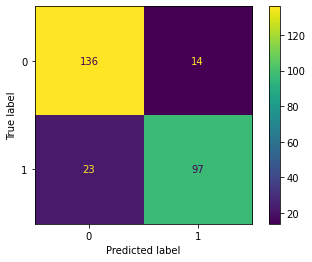

In [315]:
plot_confusion_matrix(dt_reg, X_selected_features_DT, y)